In [1]:
import numpy as np
import pandas as pd
import os
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import random

In [2]:
from IPython.display import display, HTML

In [3]:
df = pd.read_csv("../train_ver2.csv")

/Users/yangyating/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0         2015-01-28   1375586            N              ES    H   35   
1         2015-01-28   1050611            N              ES    V   23   
2         2015-01-28   1050612            N              ES    V   23   
3         2015-01-28   1050613            N              ES    H   22   
4         2015-01-28   1050614            N              ES    V   23   
...              ...       ...          ...             ...  ...  ...   
13647304  2016-05-28   1166765            N              ES    V   22   
13647305  2016-05-28   1166764            N              ES    V   23   
13647306  2016-05-28   1166763            N              ES    H   47   
13647307  2016-05-28   1166789            N              ES    H   22   
13647308  2016-05-28   1550586            N              ES    H   37   

          fecha_alta  ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1  \
0         2015-01-12        0.0          6     1.0  ...                0   
1         2012-08-10        0.0         35     1.0  ...                0   
2         2012-08-10        0.0         35     1.0  ...                0   
3         2012-08-10        0.0         35     1.0  ...                0   
4         2012-08-10        0.0         35     1.0  ...                0   
...              ...        ...        ...     ...  ...              ...   
13647304  2013-08-14        0.0         33     1.0  ...                0   
13647305  2013-08-14        0.0         33     1.0  ...                0   
13647306  2013-08-14        0.0         33     1.0  ...                0   
13647307  2013-08-14        0.0         33     1.0  ...                0   
13647308  2016-05-13        1.0          0     1.0  ...                0   

         ind_plan_fin_ult1 ind_pres_fin_ult1 ind_reca_fin_ult1  \
0                        0                 0                 0   
1                        0                 0                 0   
2                        0                 0                 0   
3                        0                 0                 0   
4                        0                 0                 0   
...                    ...               ...               ...   
13647304                 0                 0                 0   
13647305                 0                 0                 0   
13647306                 0                 0                 0   
13647307                 0                 0                 0   
13647308                 0                 0                 0   

         ind_tjcr_fin_ult1 ind_valo_fin_ult1 ind_viv_fin_ult1 ind_nomina_ult1  \
0                        0                 0                0             0.0   
1                        0                 0                0             0.0   
2                        0                 0                0             0.0   
3                        0                 0                0             0.0   
4                        0                 0                0             0.0   
...                    ...               ...              ...             ...   
13647304                 0                 0                0             0.0   
13647305                 0                 0                0             0.0   
13647306                 0                 0                0             0.0   
13647307                 0                 0                0             0.0   
13647308                 0                 0                0             0.0   

          ind_nom_pens_ult1  ind_recibo_ult1  
0                       0.0                0  
1                       0.0                0  
2                       0.0                0  
3                       0.0                0  
4                       0.0                0  
...                     ...              ...  
13647304                0.0                0  
13647305                0.0                0  
13647306                0.0    

In [5]:
for col in df.columns:
    print("@" + col)
    temp = df.loc[:, col].value_counts()
    print(temp)
    print("-"*15)
    print("total unique: " + str(len(temp)))
    print("="*30)

@fecha_dato
2016-05-28    931453
2016-04-28    928274
2016-03-28    925076
2016-02-28    920904
2016-01-28    916269
2015-12-28    912021
2015-11-28    906109
2015-10-28    892251
2015-09-28    865440
2015-08-28    843201
2015-07-28    829817
2015-06-28    632110
2015-05-28    631957
2015-04-28    630367
2015-03-28    629209
2015-02-28    627394
2015-01-28    625457
Name: fecha_dato, dtype: int64
---------------
total unique: 17
@ncodpers
32752      17
1273696    17
1224536    17
1199940    17
1208128    17
           ..
1549150     1
1543059     1
1535935     1
1551255     1
1489485     1
Name: ncodpers, Length: 956645, dtype: int64
---------------
total unique: 956645
@ind_empleado
N    13610977
B        3566
F        2523
A        2492
S          17
Name: ind_empleado, dtype: int64
---------------
total unique: 5
@pais_residencia
ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
        ...   
JM          11
ZW          11
DJ          11
BM           6
MT   

0    12543689
1     1103620
Name: ind_cno_fin_ult1, dtype: int64
---------------
total unique: 2
@ind_ctju_fin_ult1
0    13518012
1      129297
Name: ind_ctju_fin_ult1, dtype: int64
---------------
total unique: 2
@ind_ctma_fin_ult1
0    13514567
1      132742
Name: ind_ctma_fin_ult1, dtype: int64
---------------
total unique: 2
@ind_ctop_fin_ult1
0    11886693
1     1760616
Name: ind_ctop_fin_ult1, dtype: int64
---------------
total unique: 2
@ind_ctpp_fin_ult1
0    13056301
1      591008
Name: ind_ctpp_fin_ult1, dtype: int64
---------------
total unique: 2
@ind_deco_fin_ult1
0    13623034
1       24275
Name: ind_deco_fin_ult1, dtype: int64
---------------
total unique: 2
@ind_deme_fin_ult1
0    13624641
1       22668
Name: ind_deme_fin_ult1, dtype: int64
---------------
total unique: 2
@ind_dela_fin_ult1
0    13060928
1      586381
Name: ind_dela_fin_ult1, dtype: int64
---------------
total unique: 2
@ind_ecue_fin_ult1
0    12518082
1     1129227
Name: ind_ecue_fin_ult1, dtype: int64

In [6]:
df.columns 

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

### pie chart for all

In [7]:
colors = []
for i in range(24):
    colors.append((round(random.uniform(0.5, 1), 2), round(random.uniform(0.5, 1), 2), round(random.uniform(0.5, 1), 2)))

In [8]:
colors

[(0.67, 0.81, 0.75),
 (0.87, 0.9, 0.62),
 (0.84, 0.77, 0.51),
 (0.95, 0.85, 0.73),
 (0.53, 0.93, 0.98),
 (0.82, 0.77, 0.65),
 (0.99, 0.91, 0.86),
 (0.53, 0.94, 0.92),
 (0.84, 0.77, 0.79),
 (0.96, 0.92, 0.99),
 (0.67, 0.52, 0.91),
 (0.93, 0.51, 0.88),
 (0.94, 0.8, 0.94),
 (0.75, 0.98, 0.68),
 (0.91, 0.56, 0.87),
 (0.72, 0.89, 0.86),
 (0.85, 0.56, 0.56),
 (0.89, 0.78, 0.83),
 (0.93, 0.55, 0.61),
 (0.65, 0.82, 0.53),
 (0.51, 0.86, 0.55),
 (0.51, 0.65, 0.6),
 (0.71, 0.56, 0.9),
 (0.81, 0.89, 0.69)]

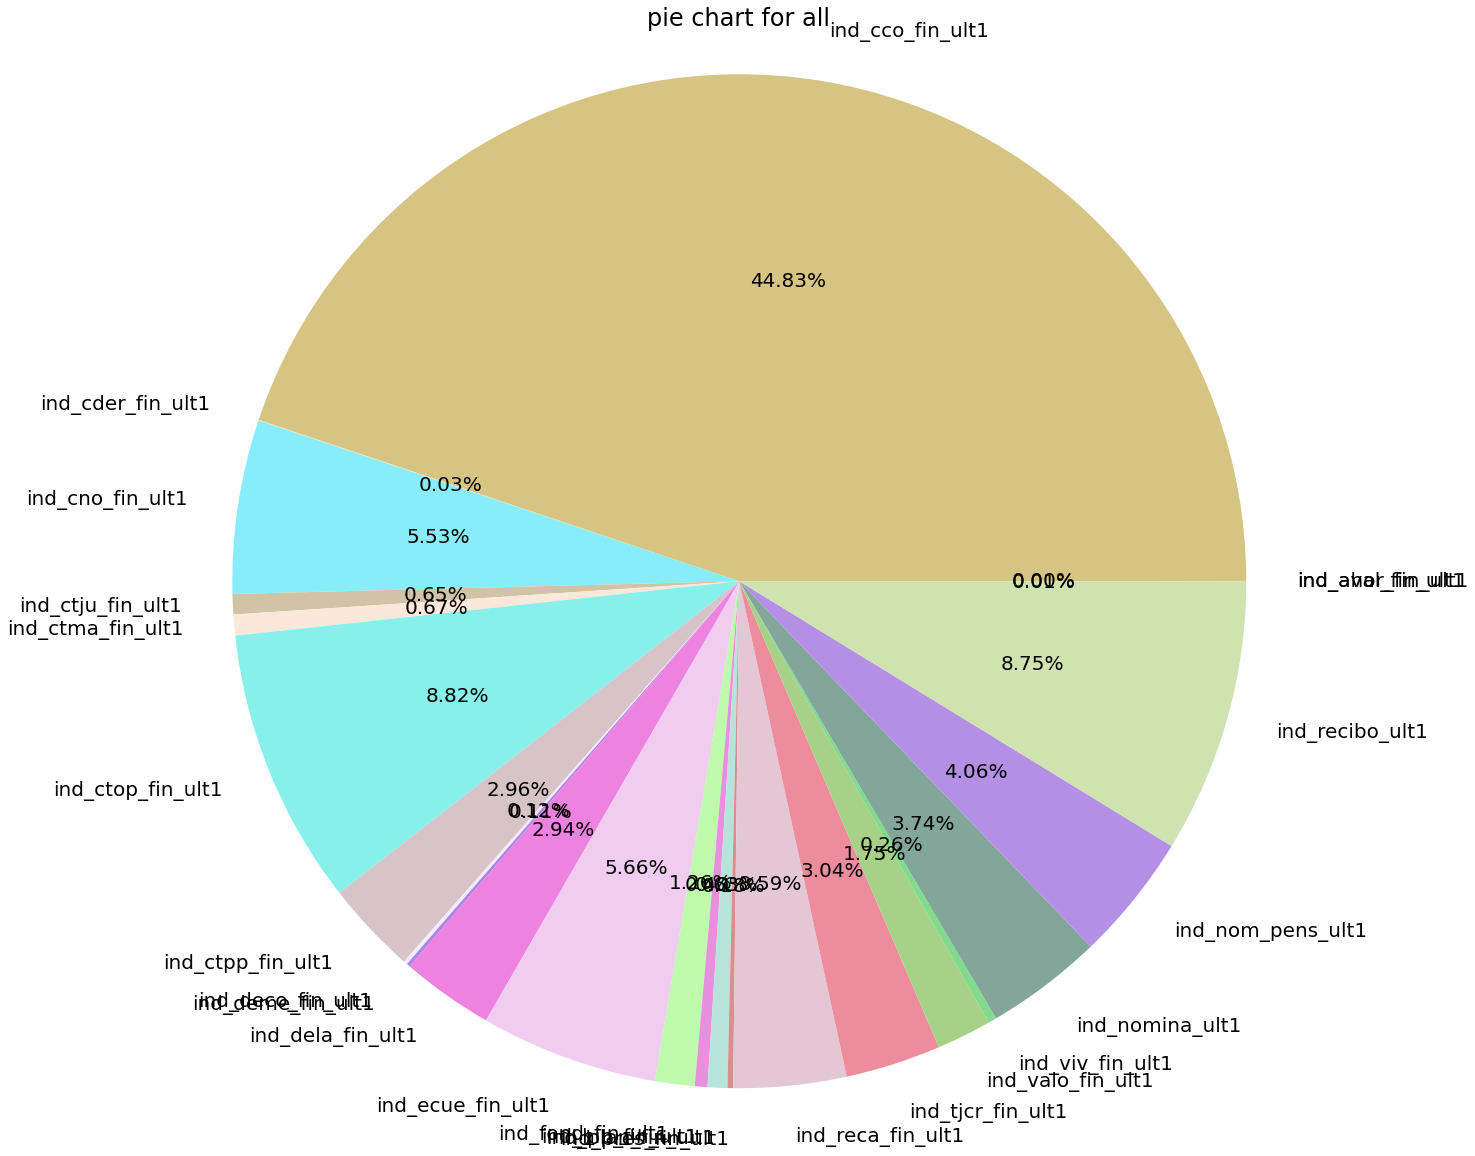

In [9]:
df_sum = df.iloc[:,24:].sum()
plt.figure(figsize = (20, 20))
plt.pie(df_sum, labels = df_sum.index, autopct = '%1.2f%%', colors = colors, textprops={'fontsize': 20})
plt.axis('equal')
plt.title("pie chart for all", fontsize=24)
plt.savefig("pie_chart_all" + ".jpg")

### pie chart for different month

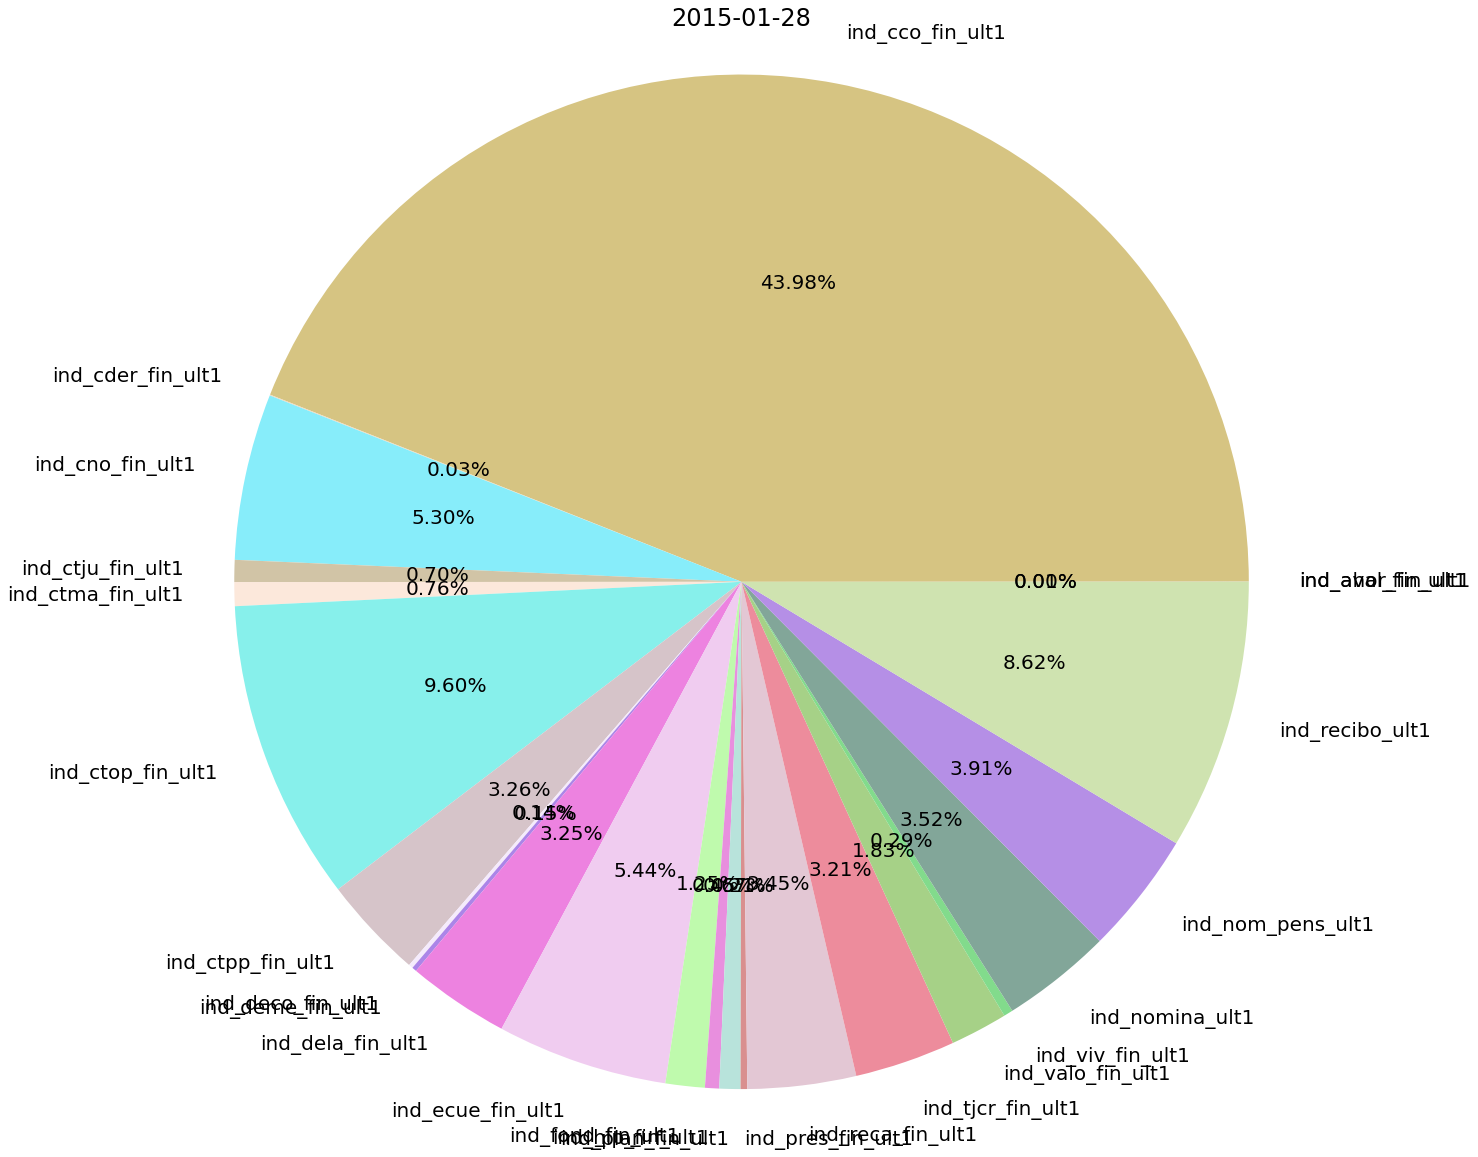

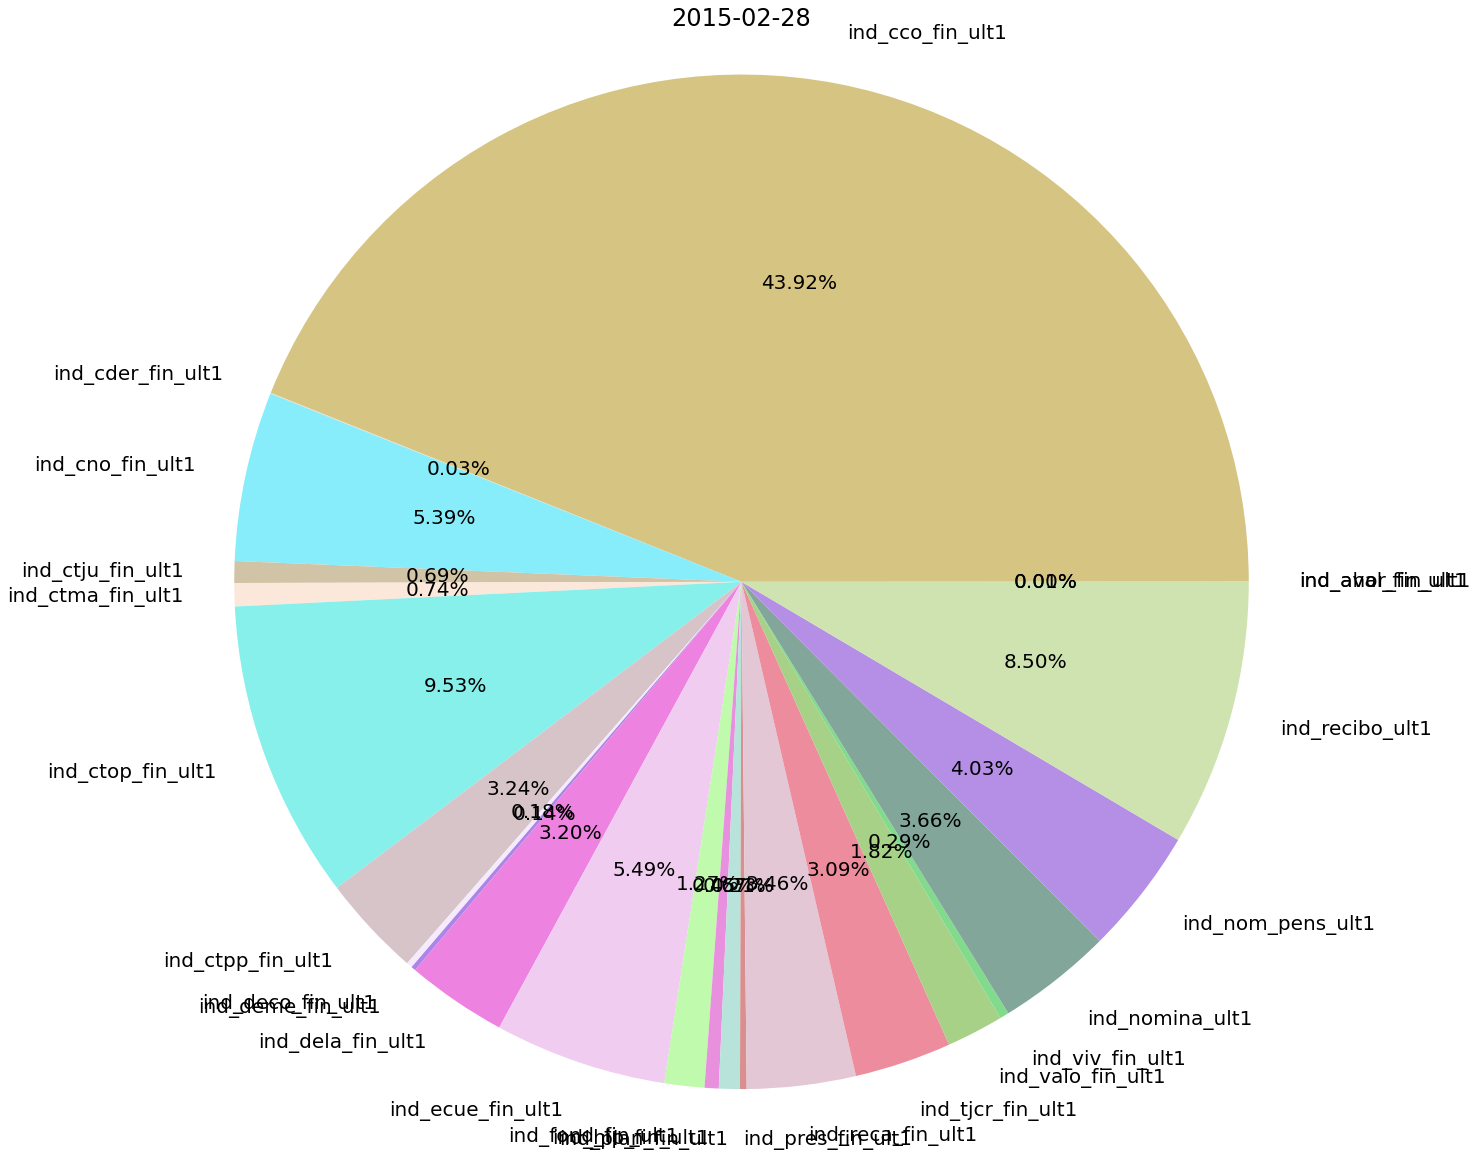

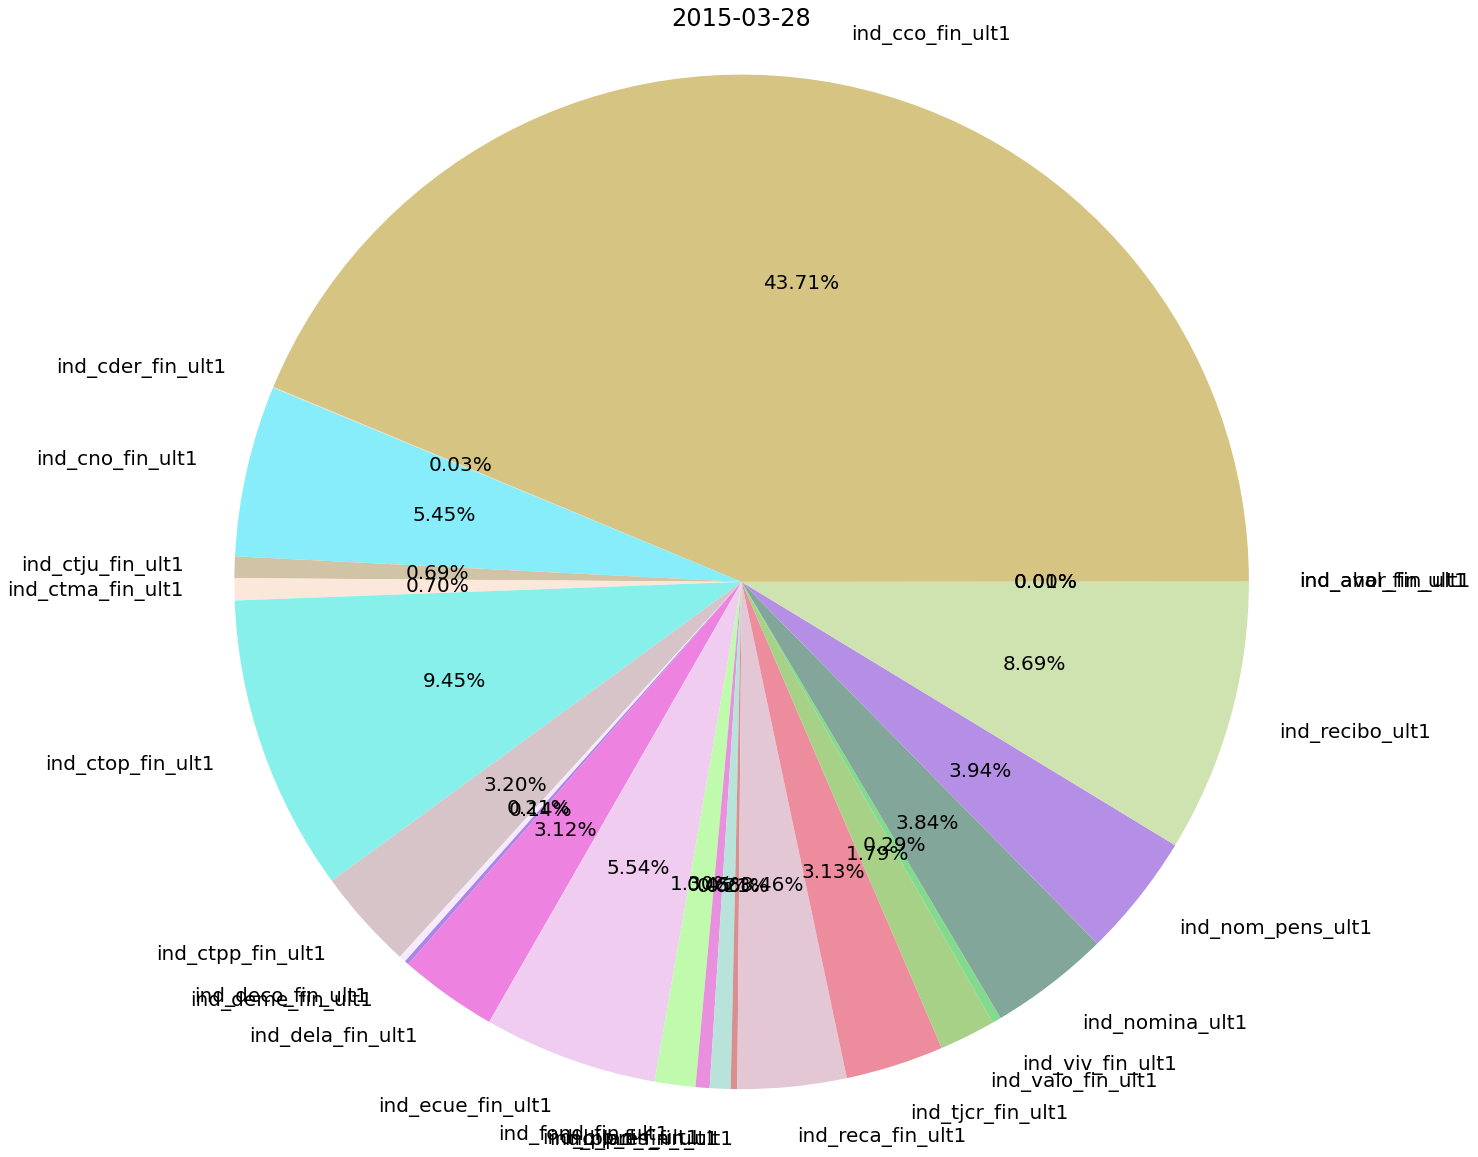

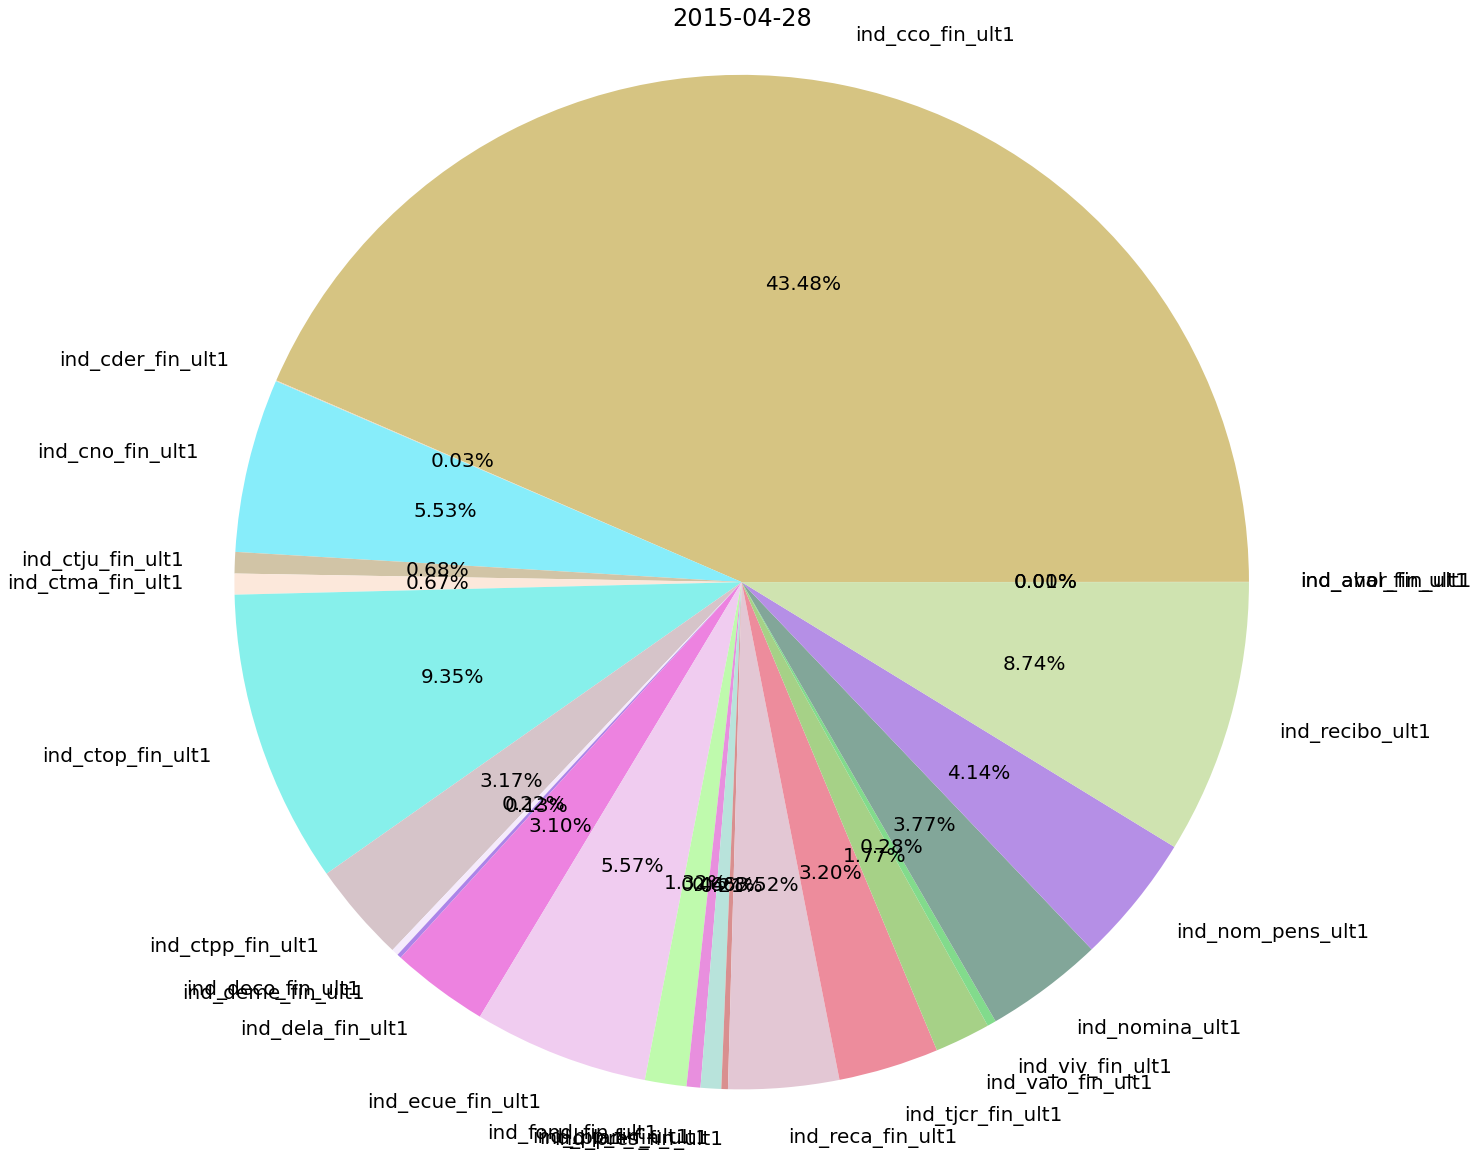

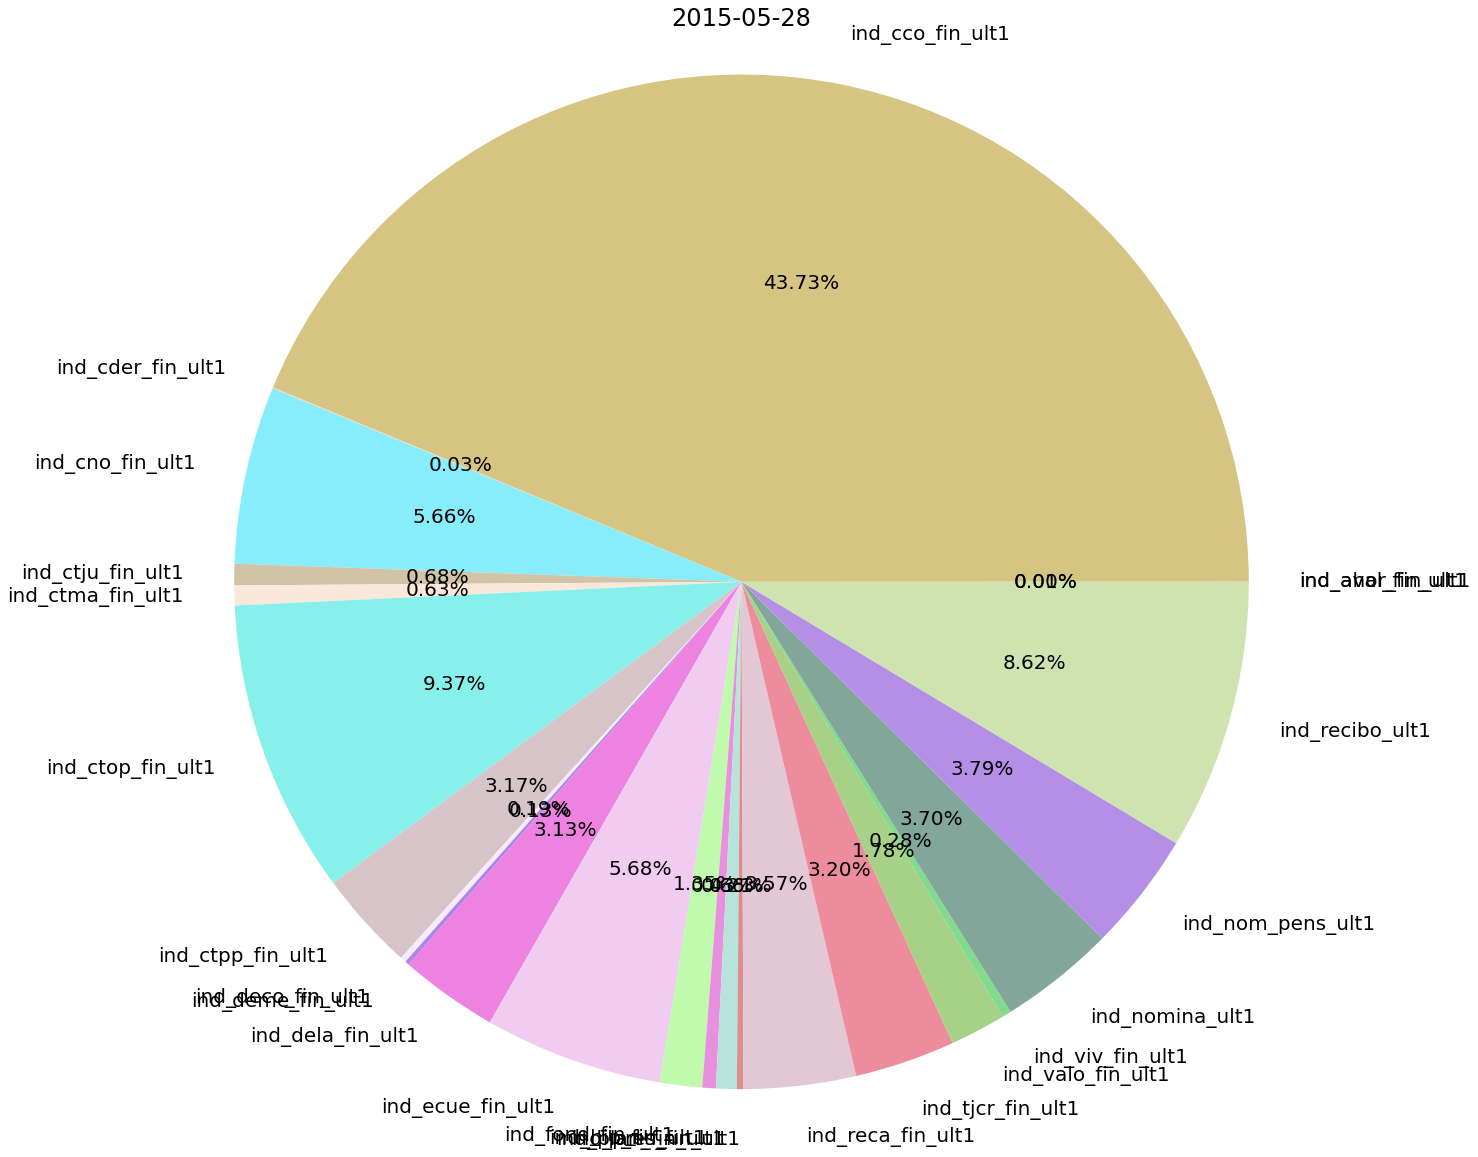

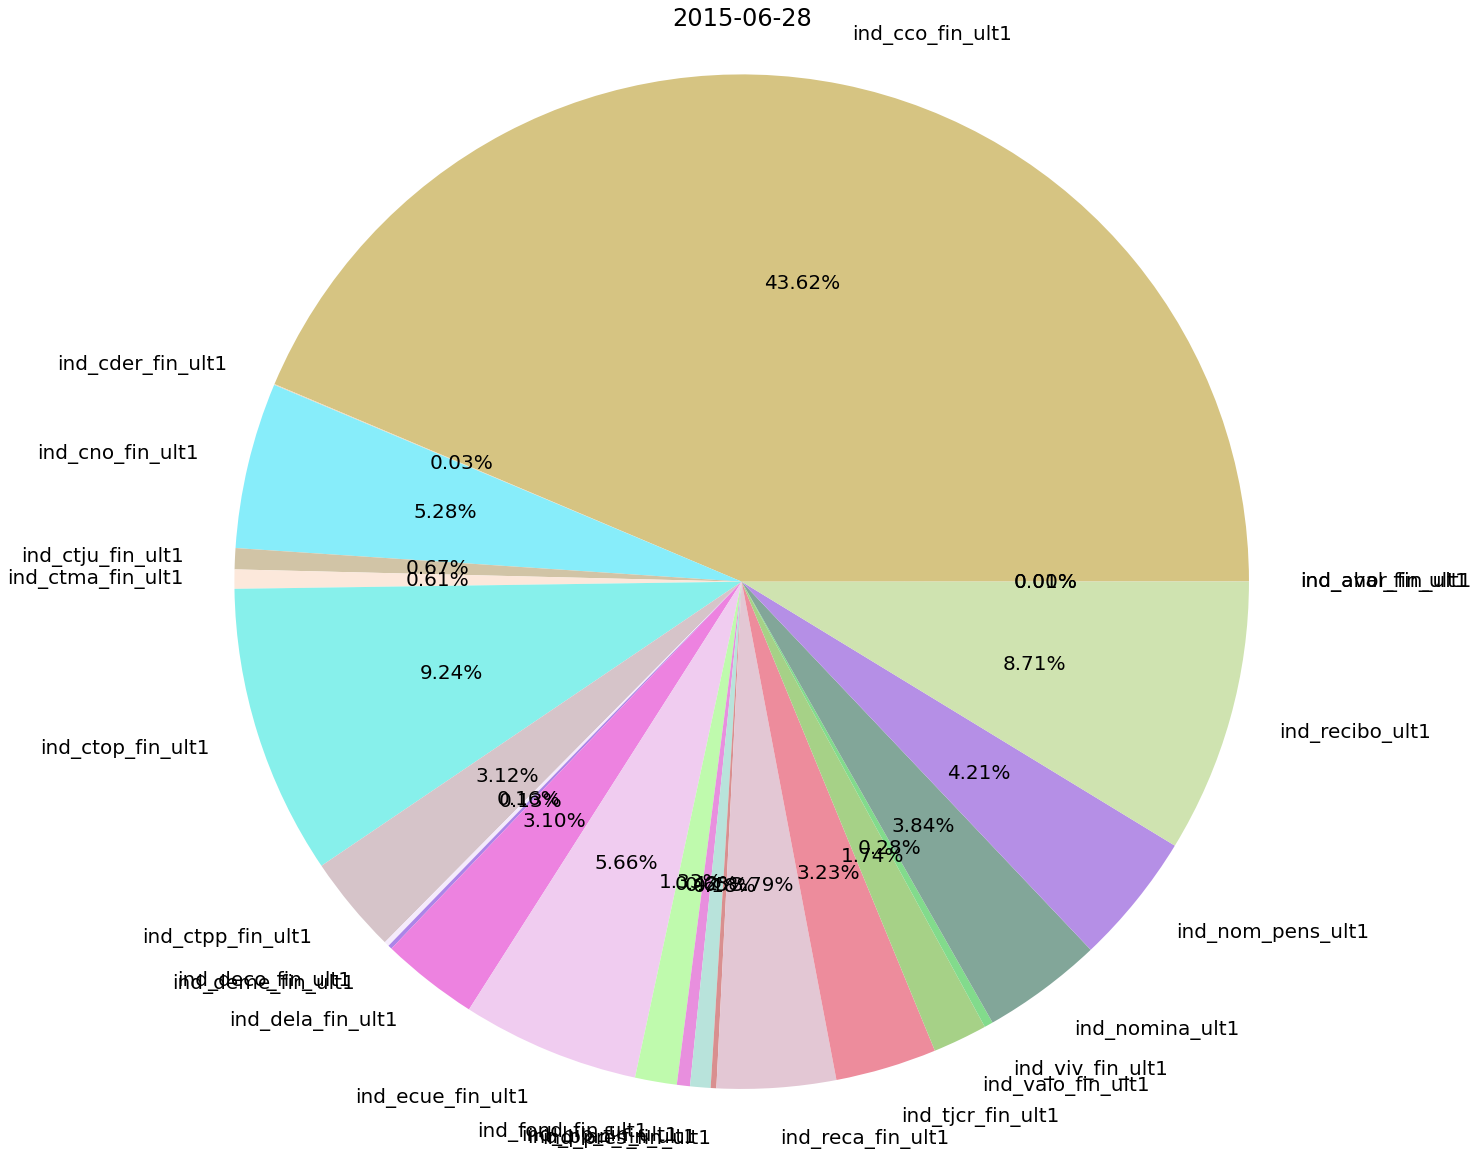

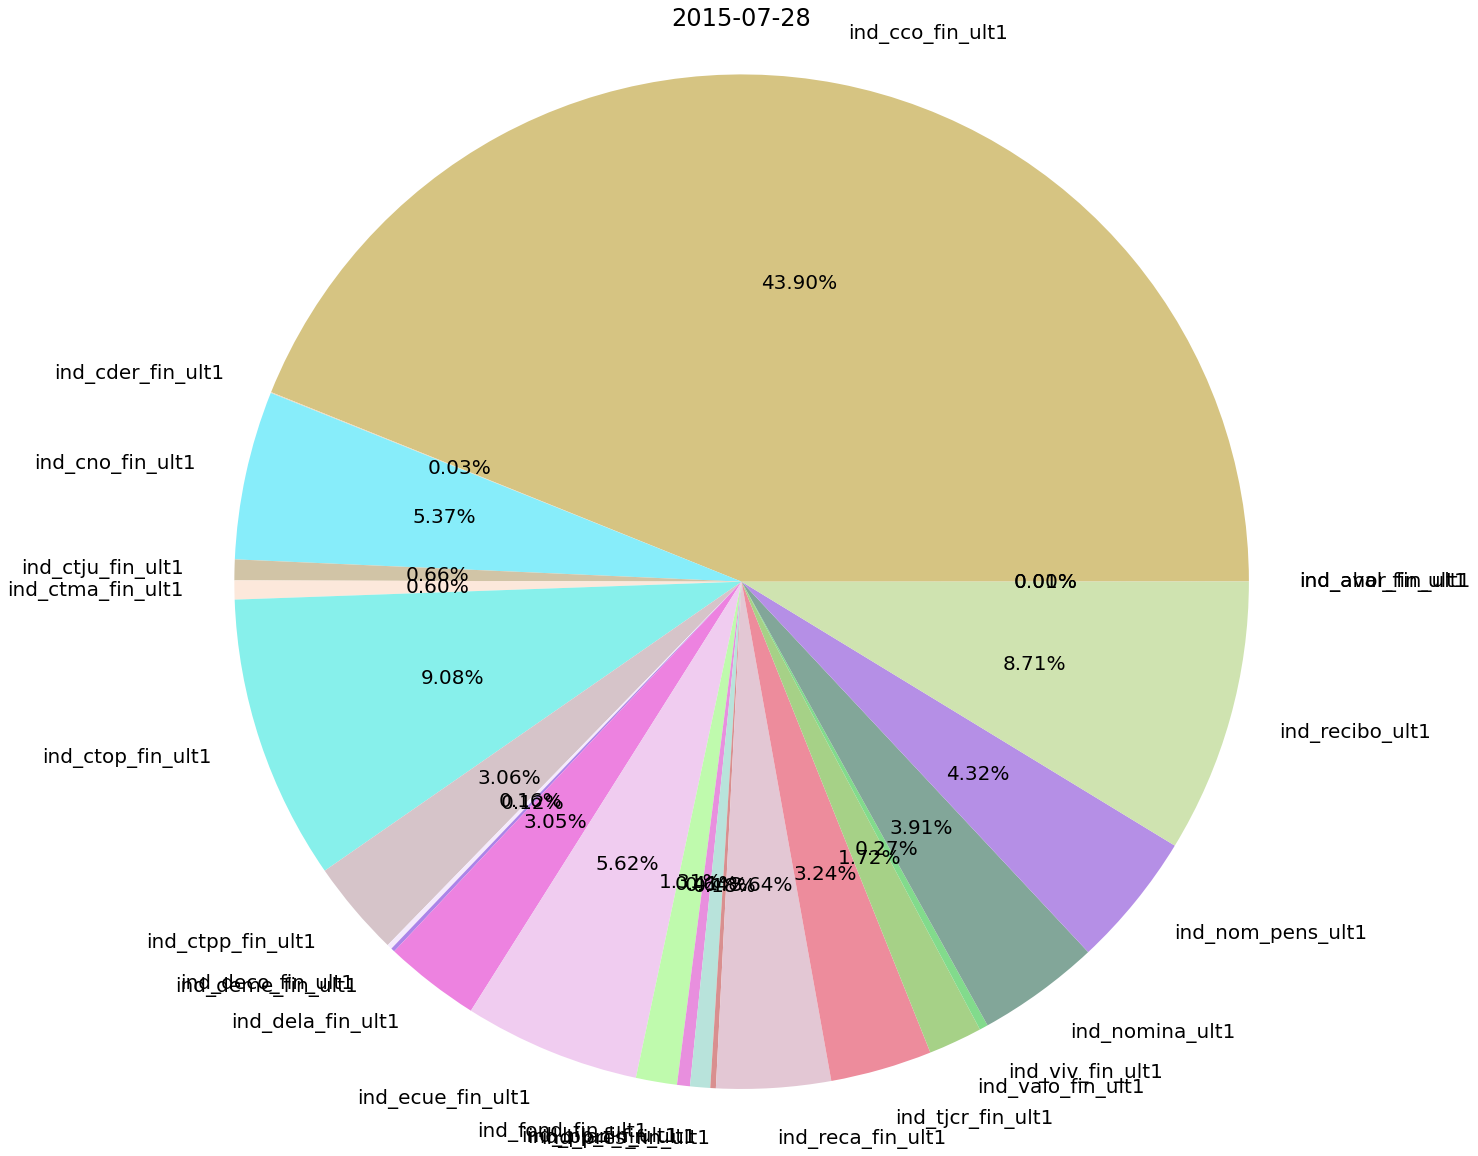

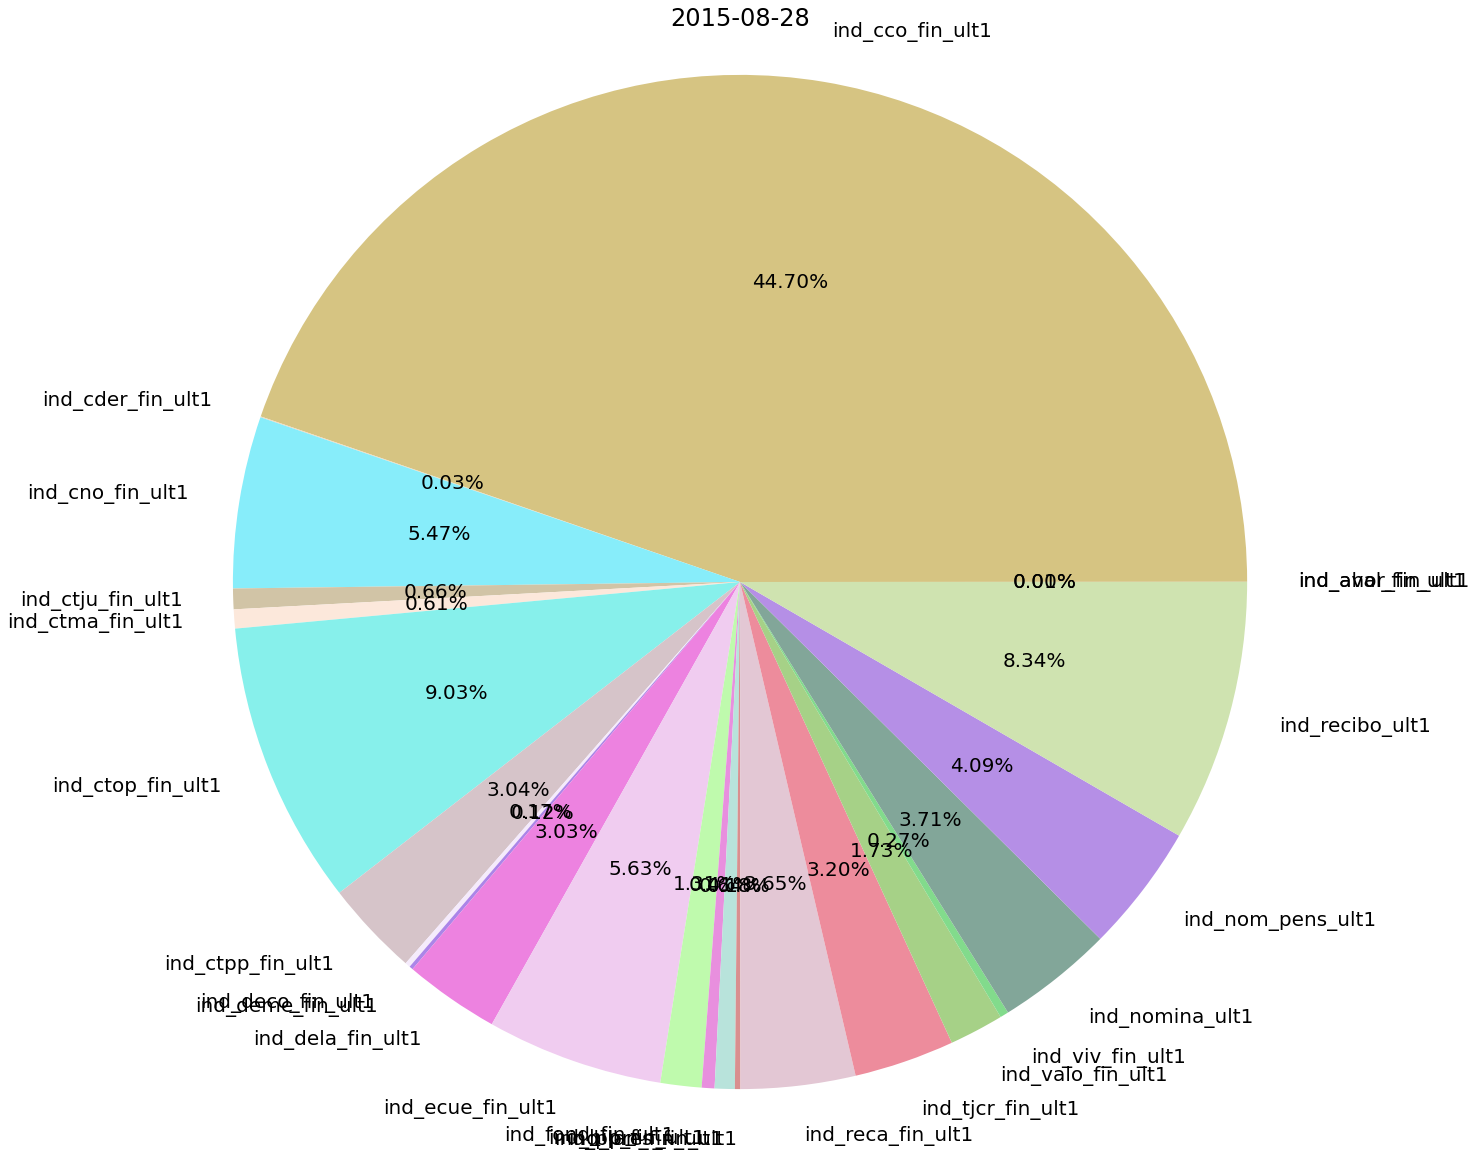

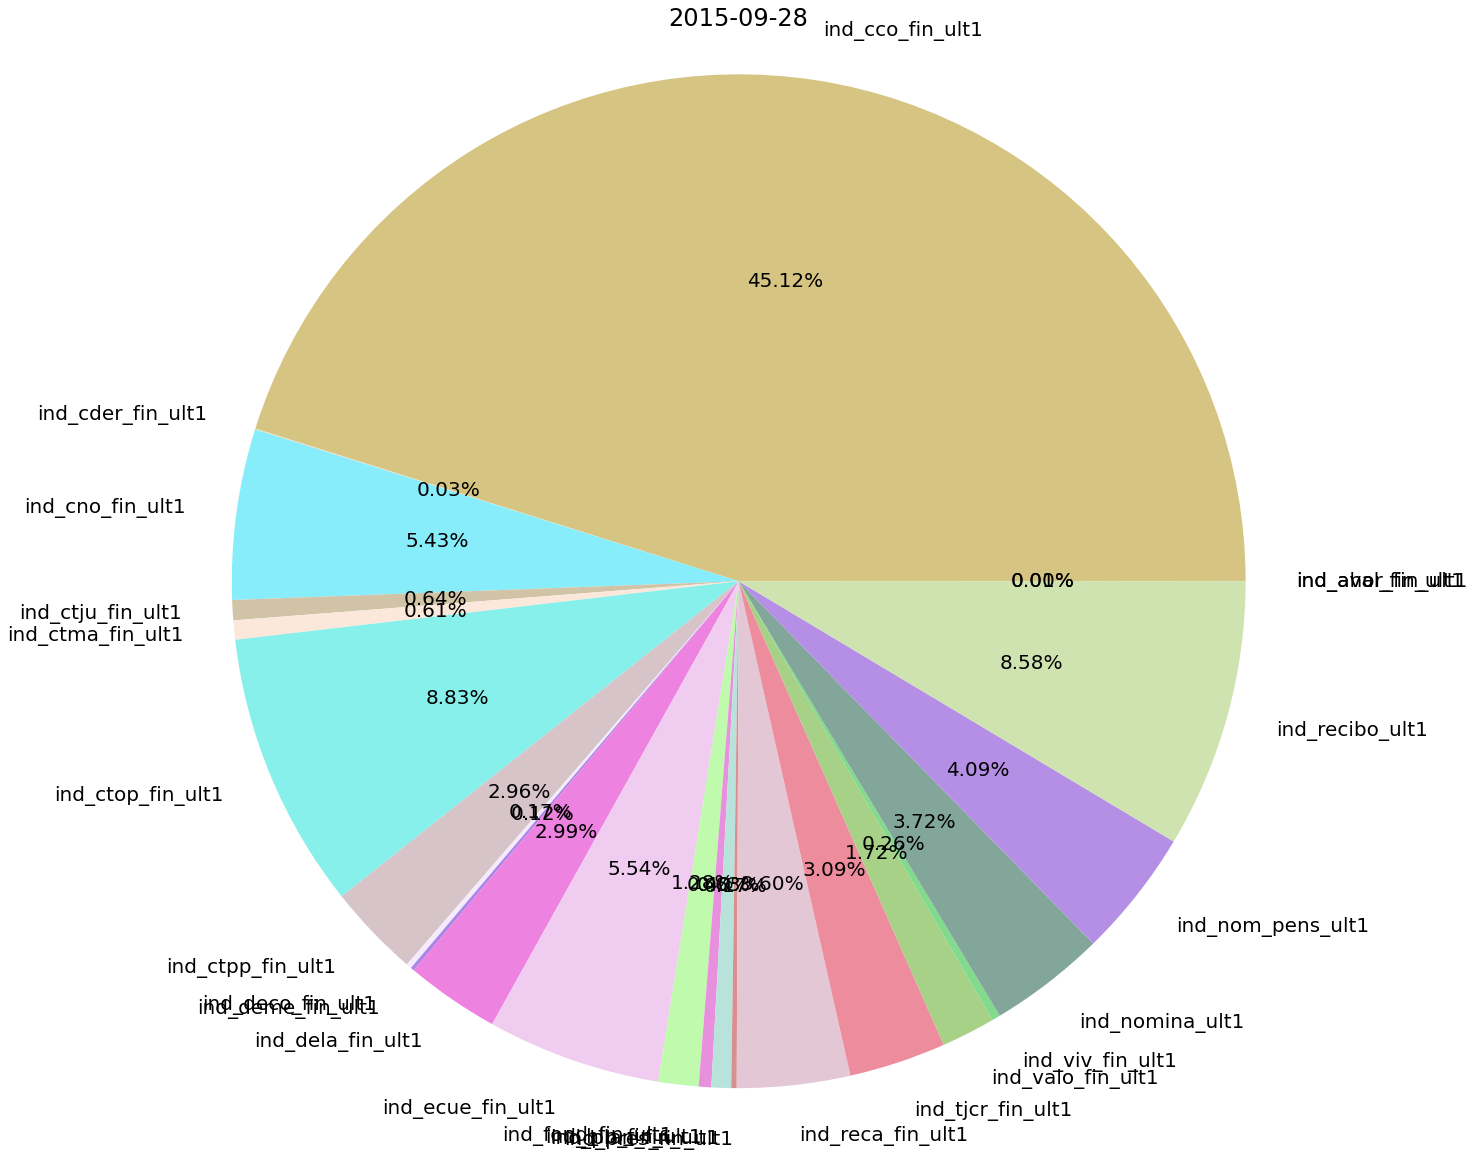

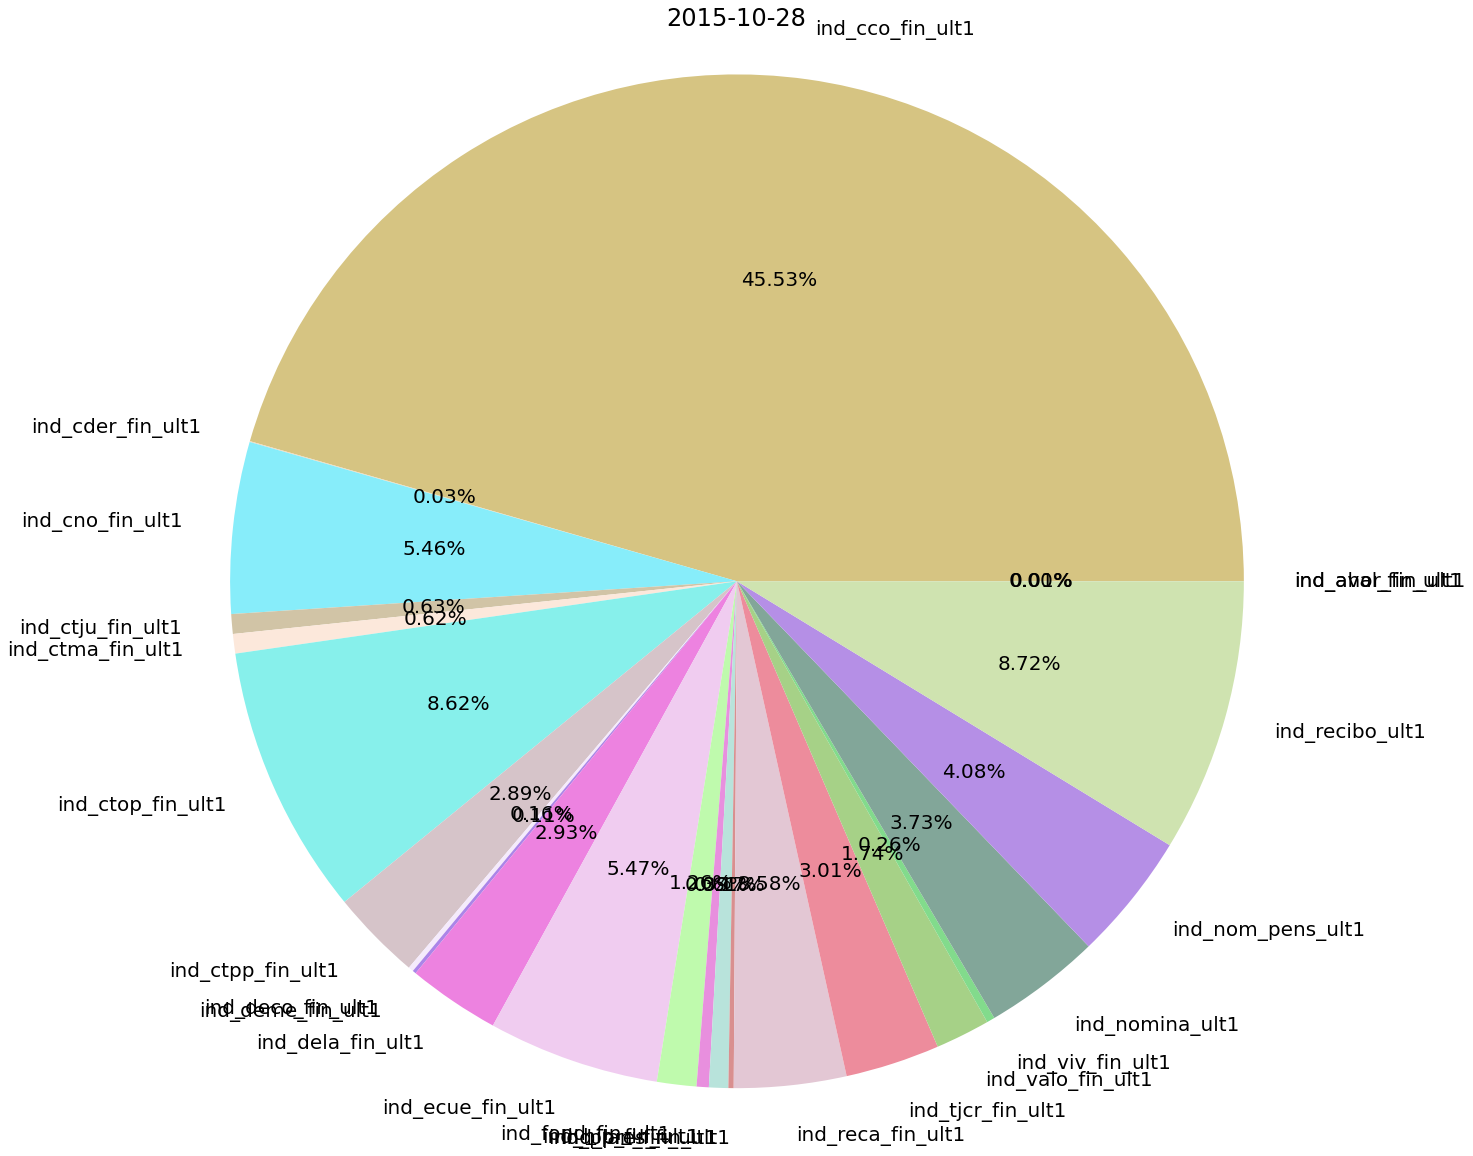

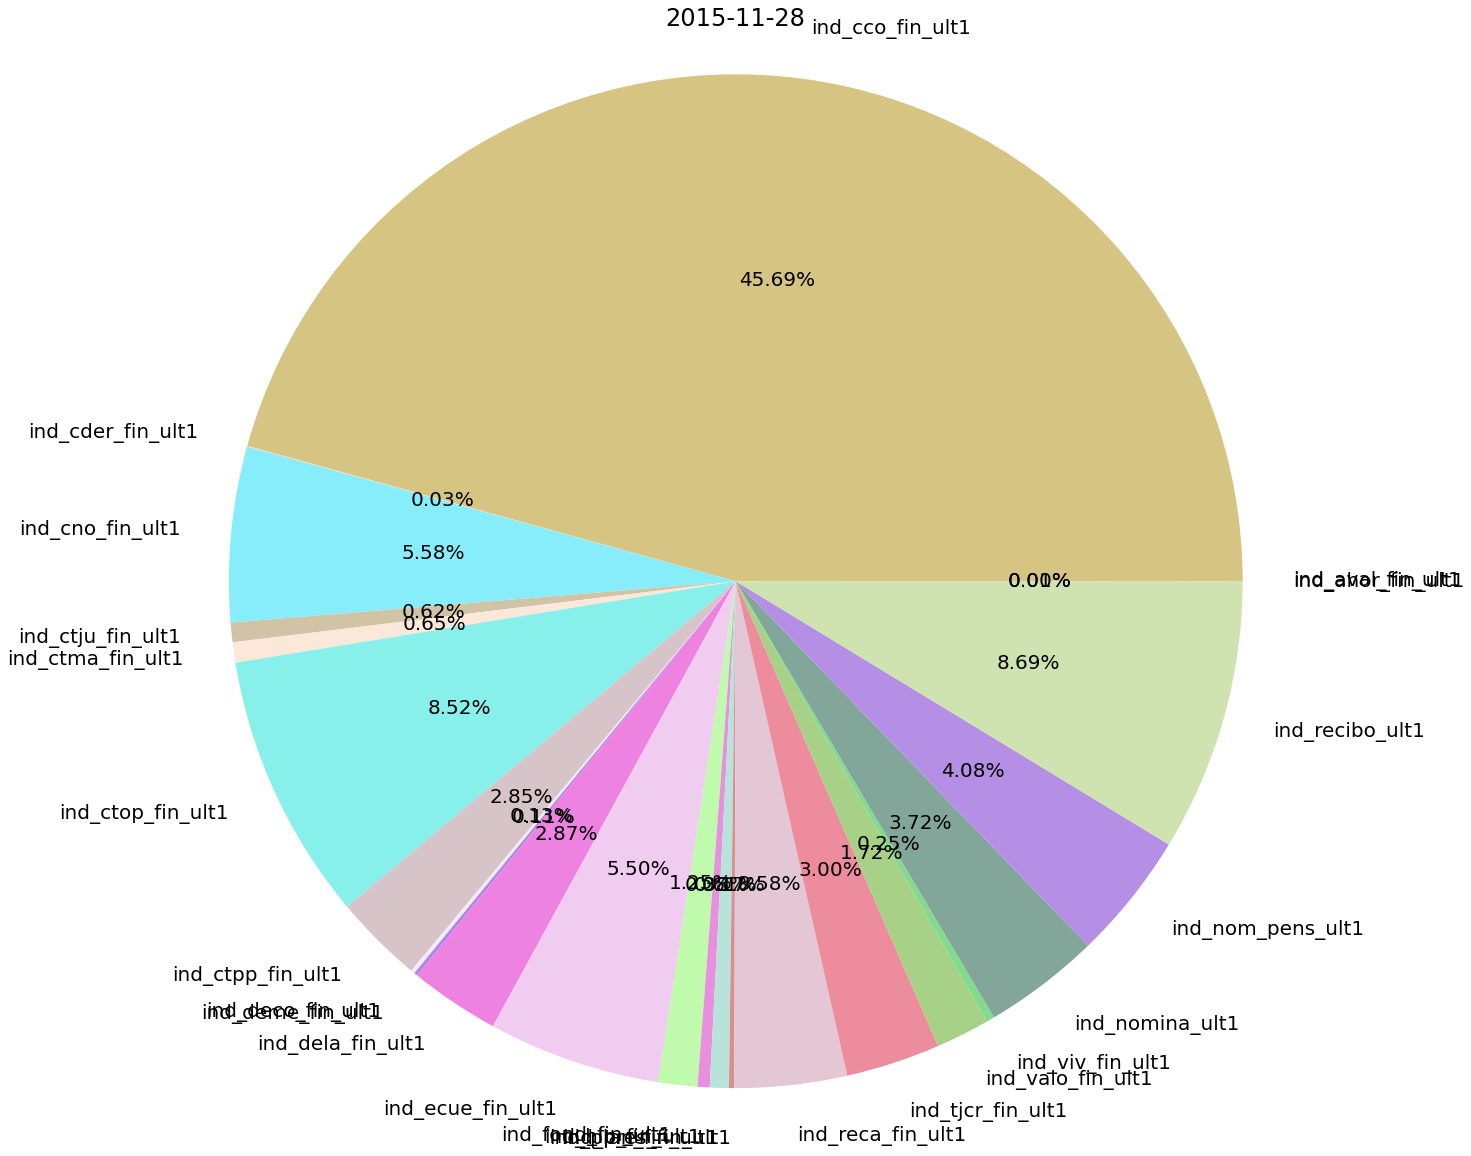

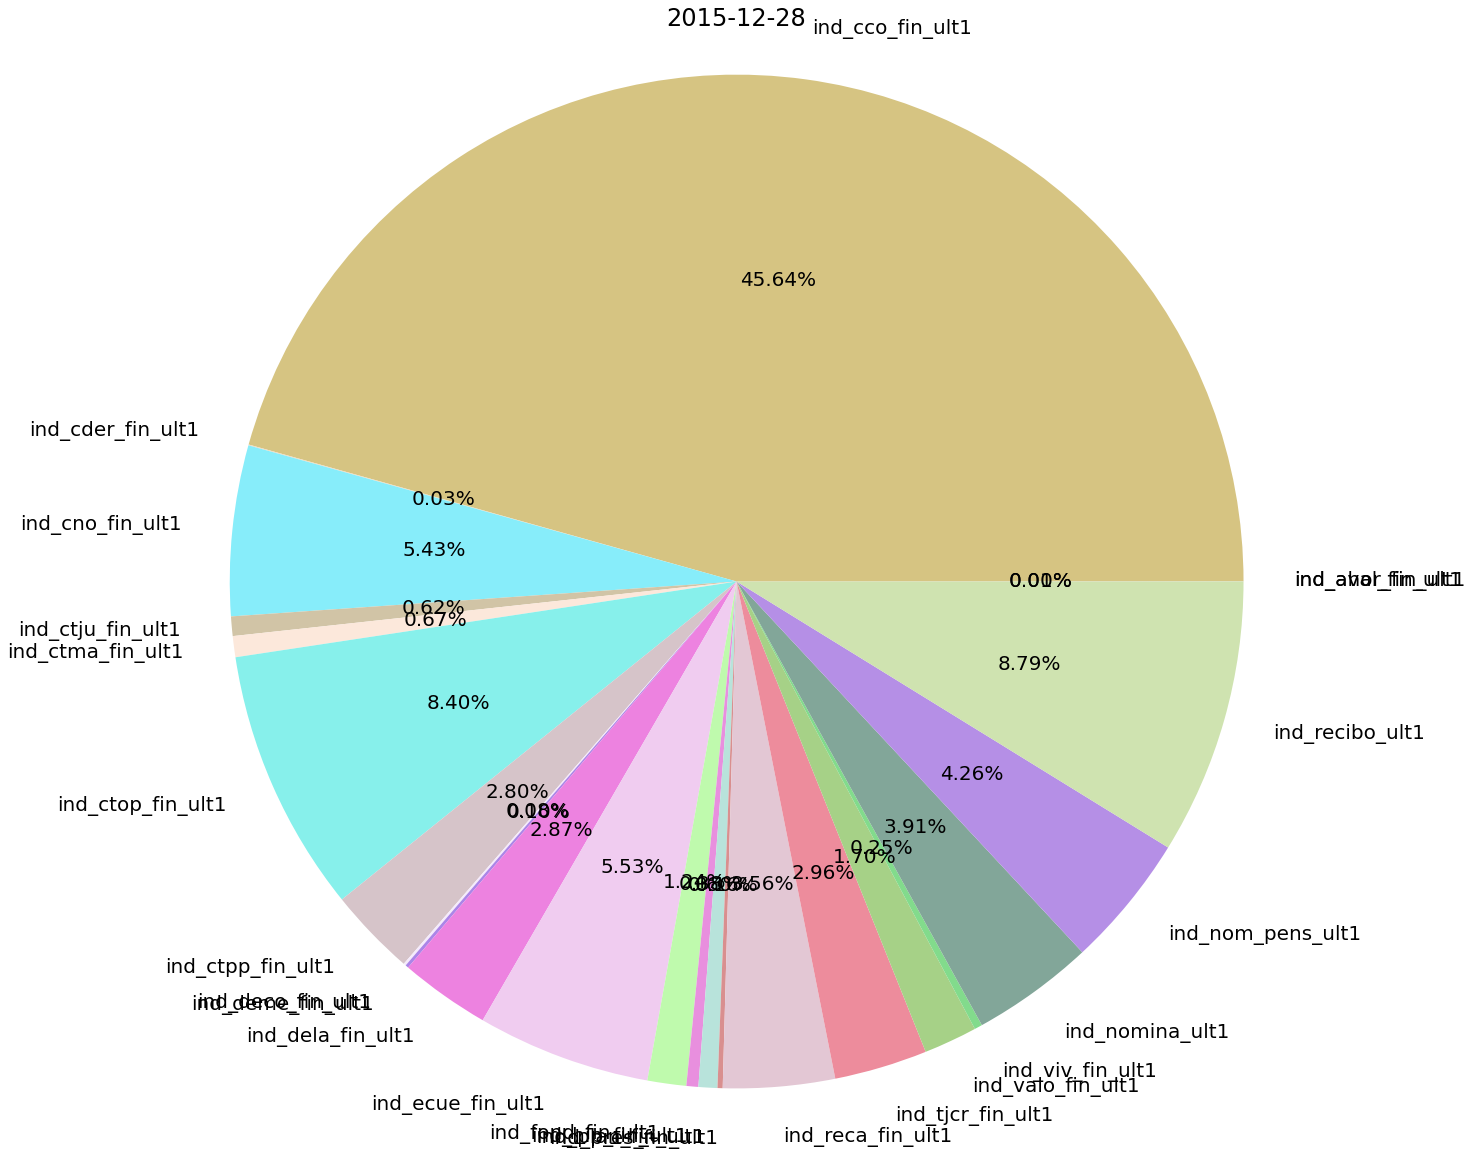

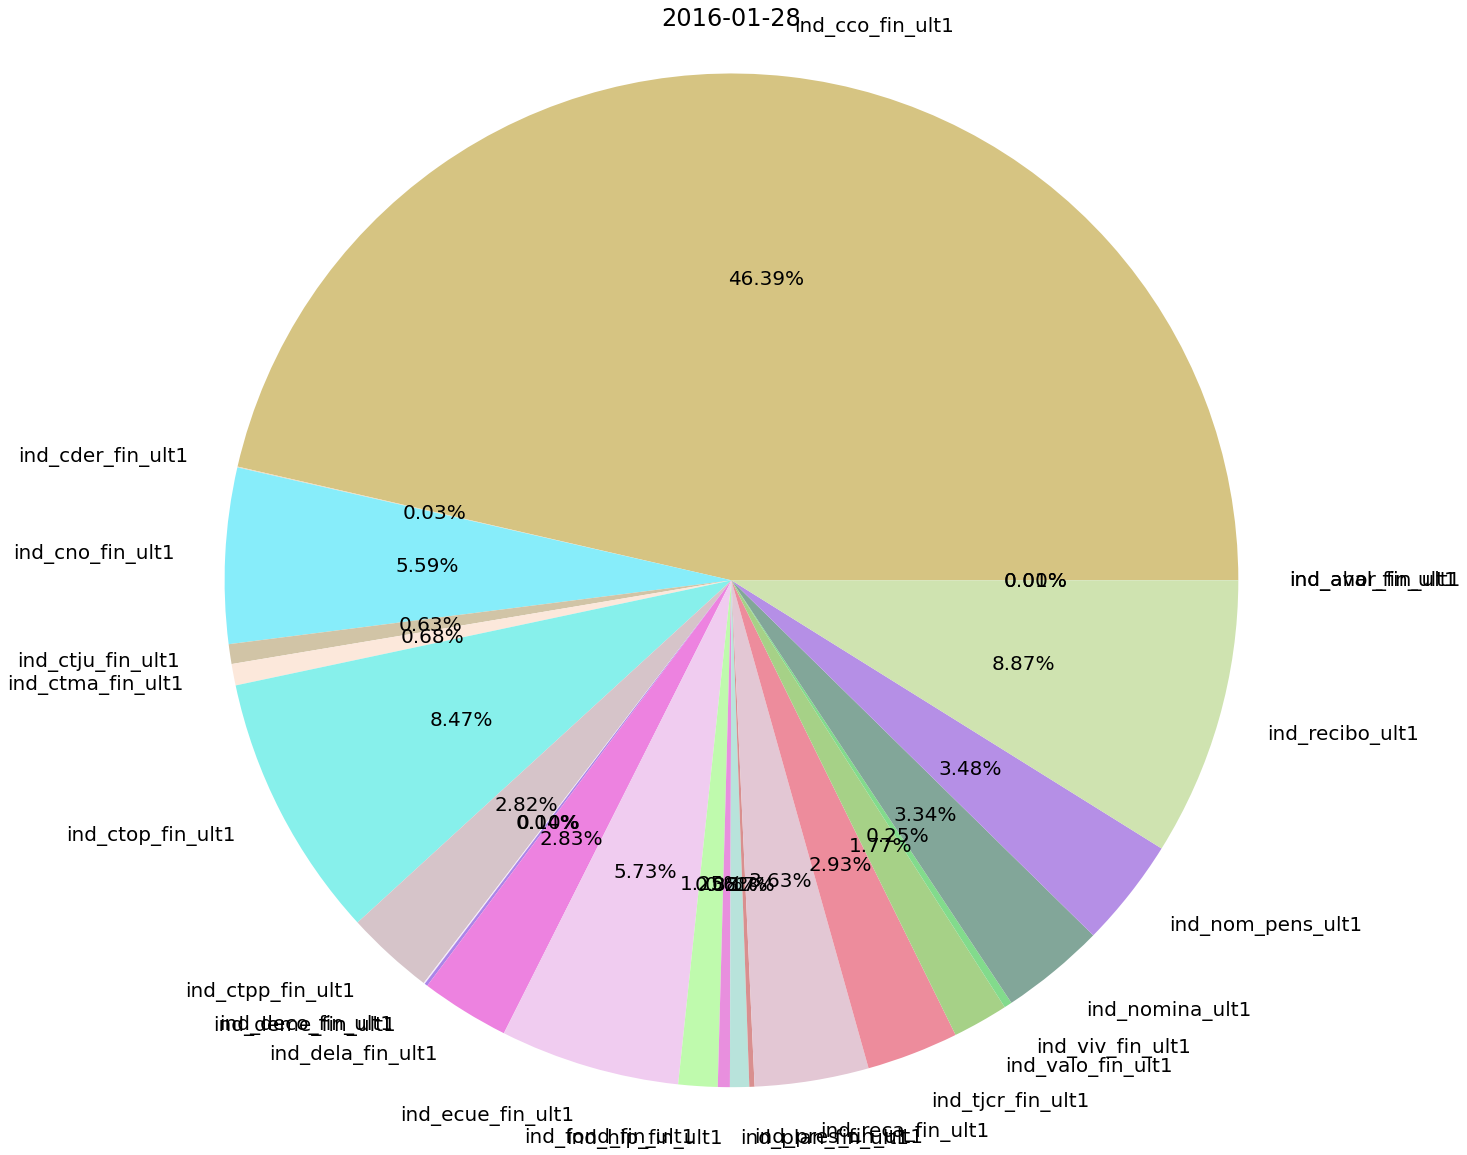

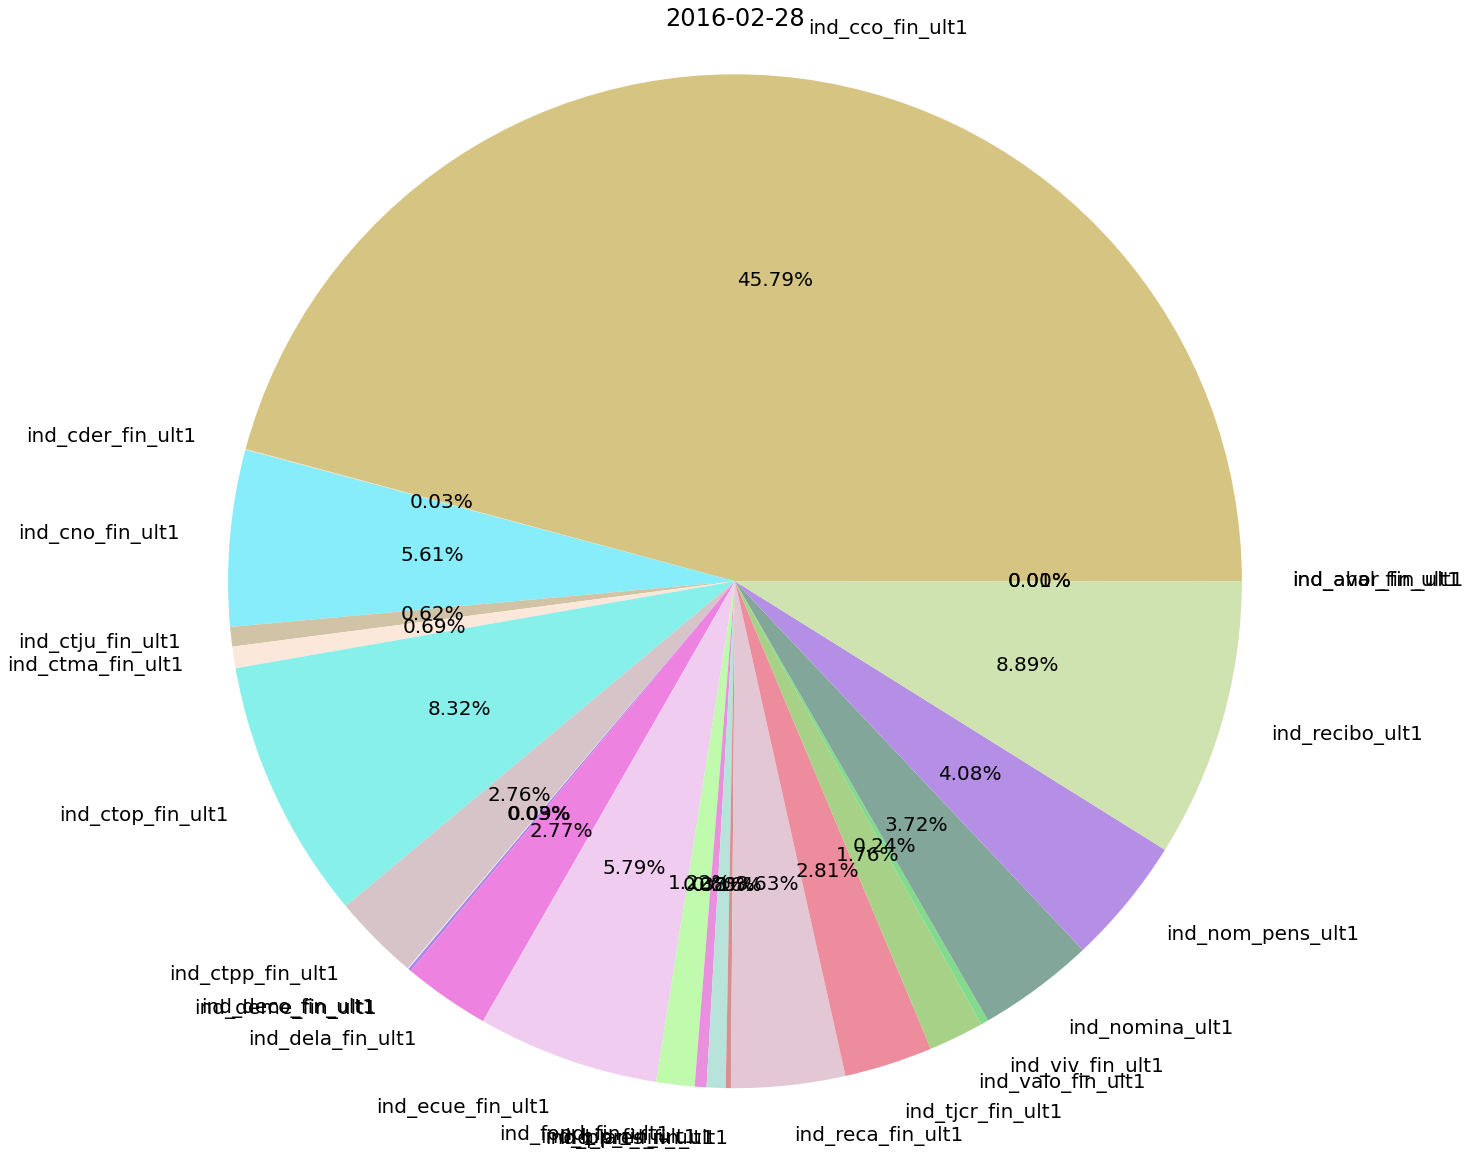

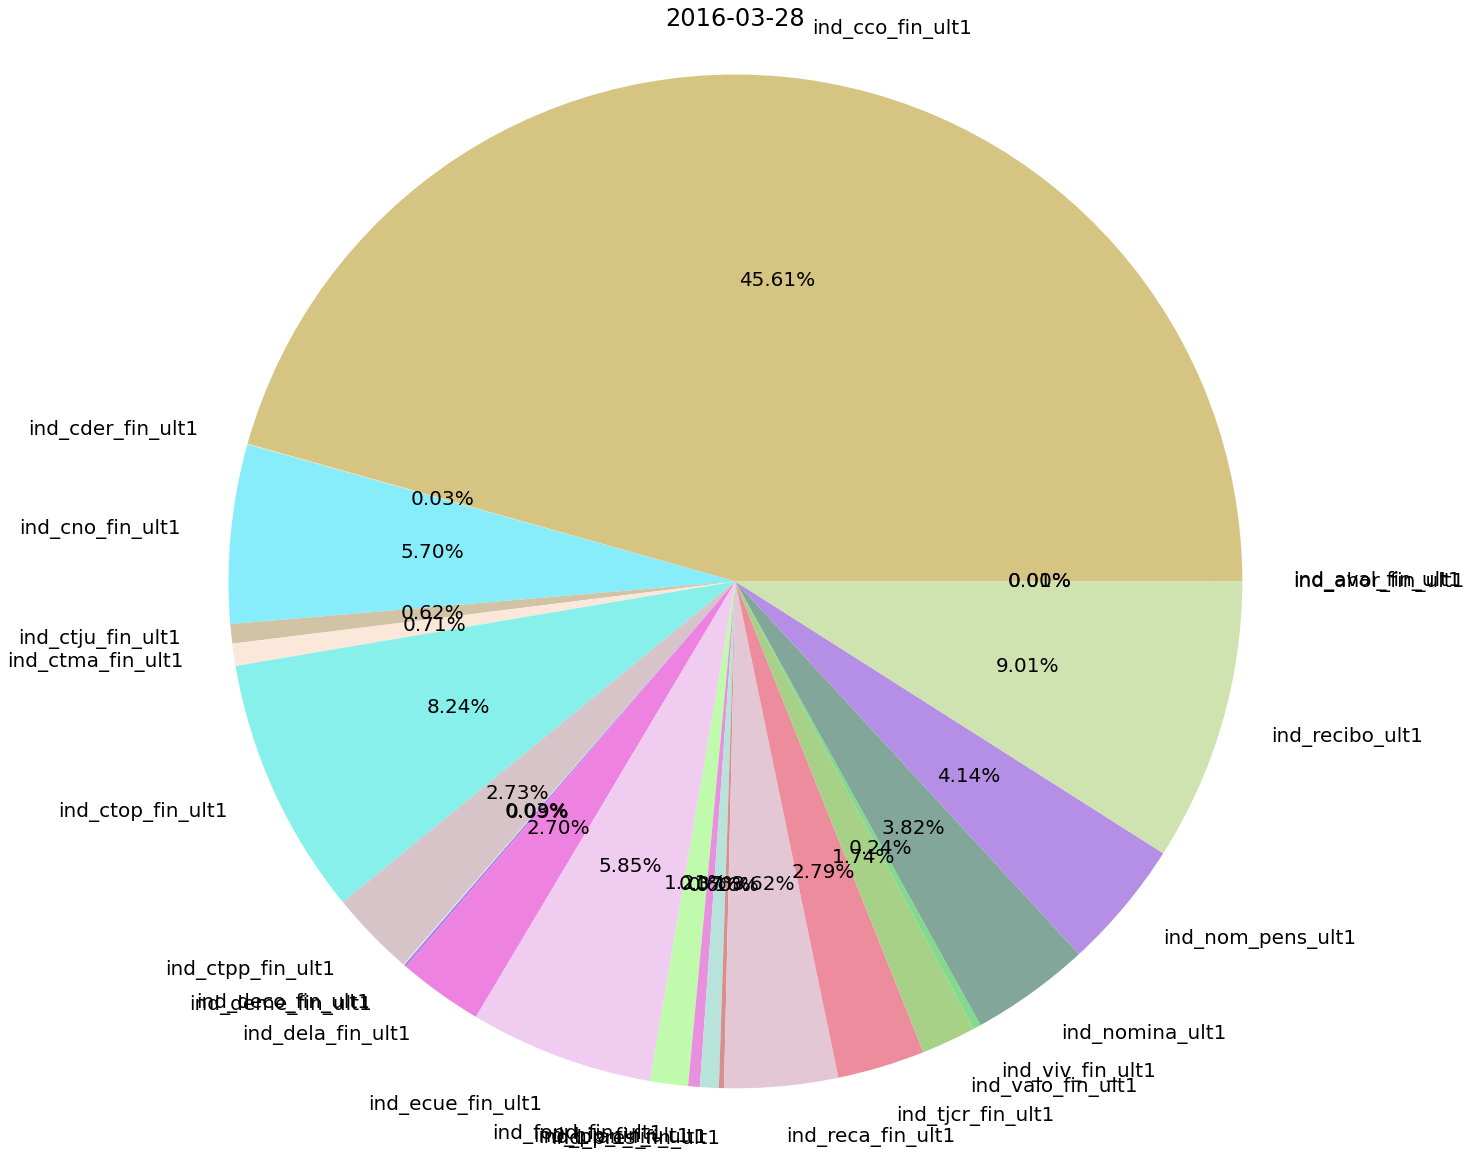

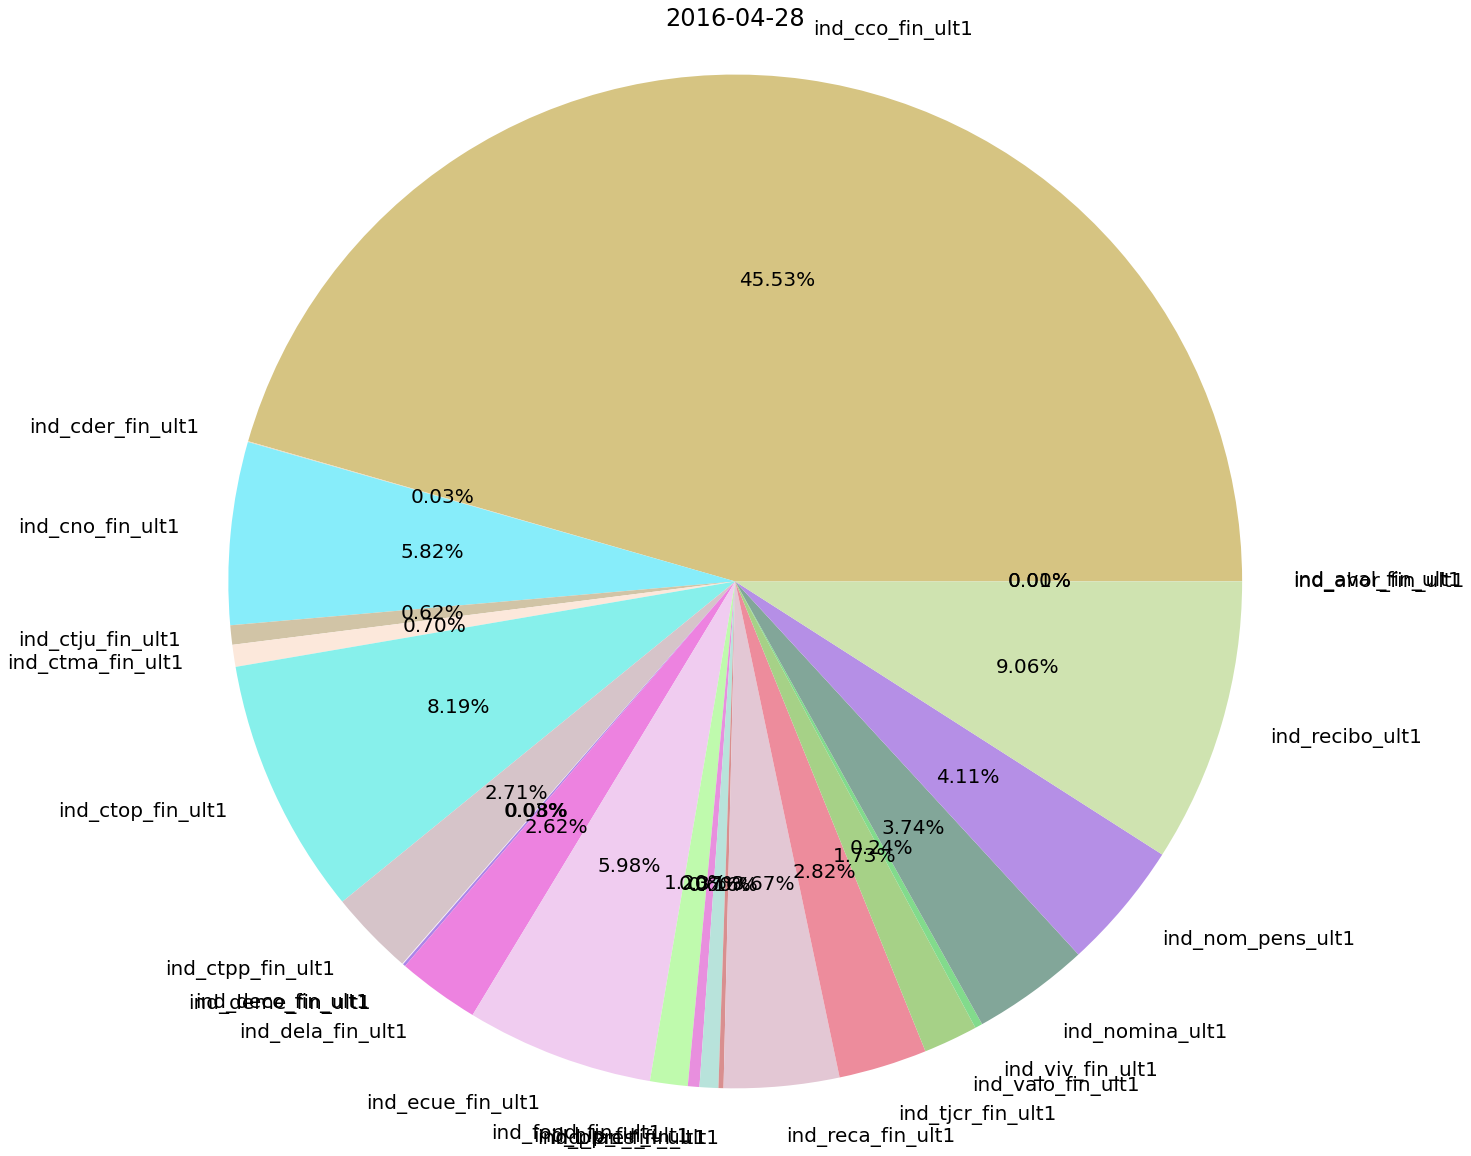

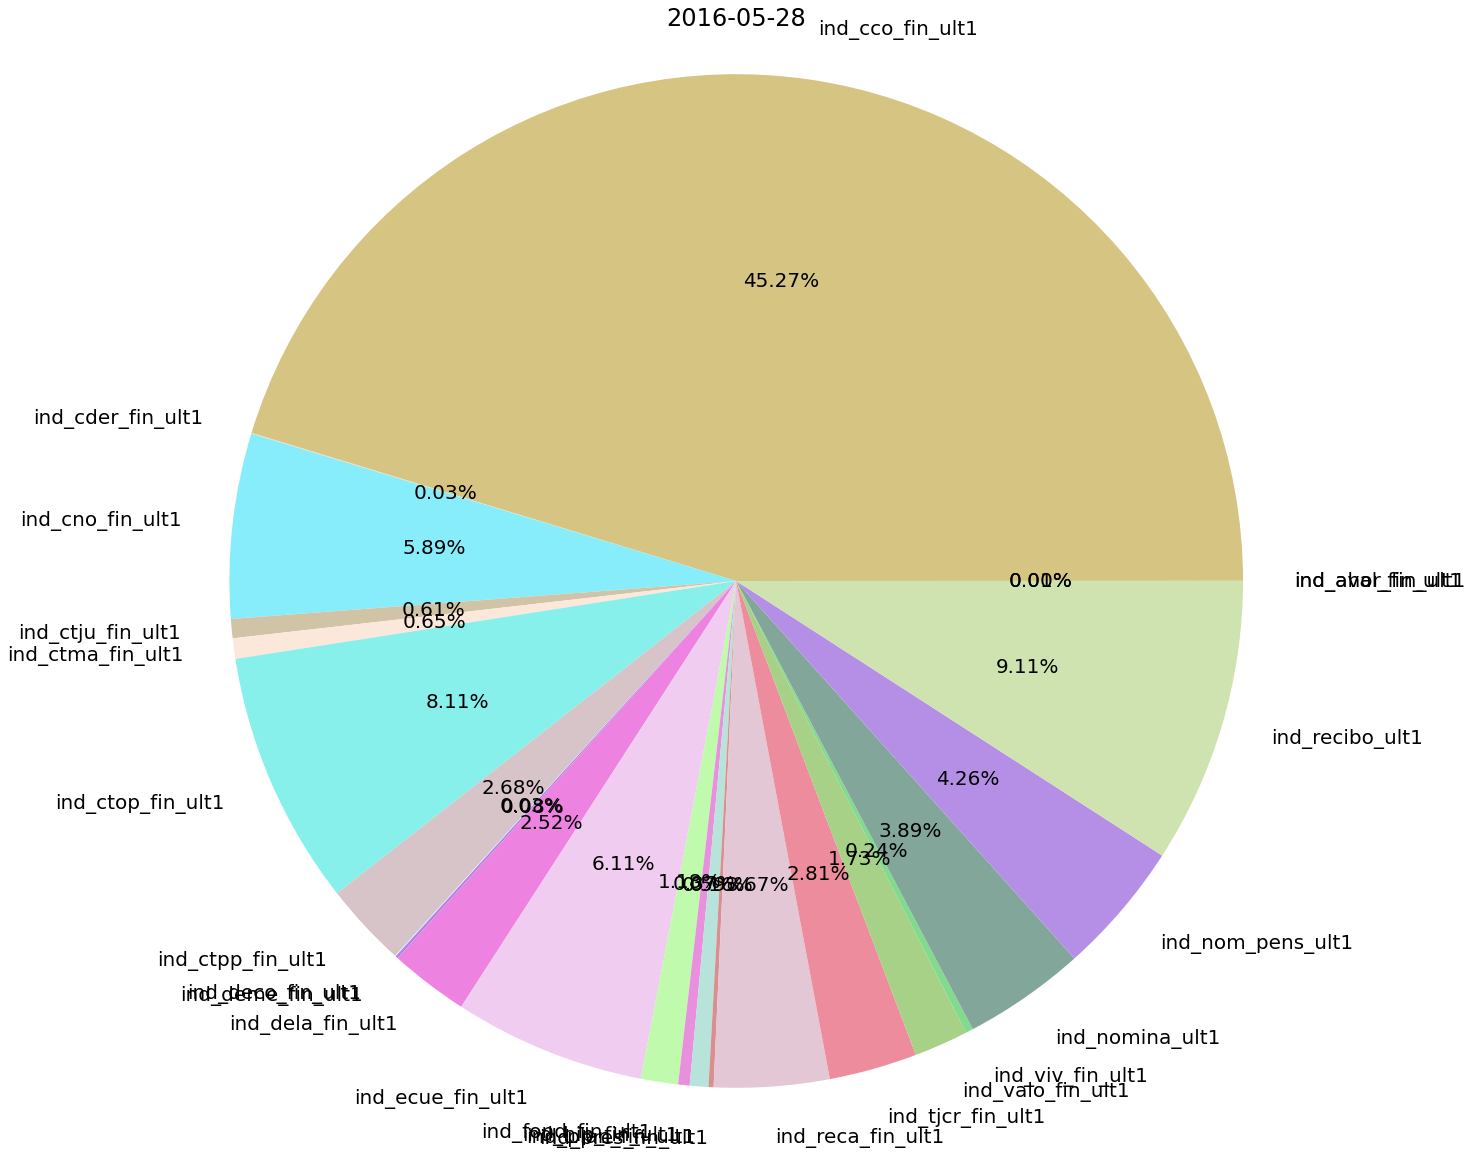

In [10]:
for month in df.loc[:, 'fecha_dato'].unique():
    df_sum = df[df.loc[:, 'fecha_dato'] == month].iloc[:,24:].sum()
    plt.figure(figsize = (20, 20))
    plt.pie(df_sum, labels = df_sum.index, autopct = '%1.2f%%', colors = colors, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.title(month, fontsize=24)
    #plt.savefig("pie_chart_" + month + ".jpg")

### pie chart for different gender

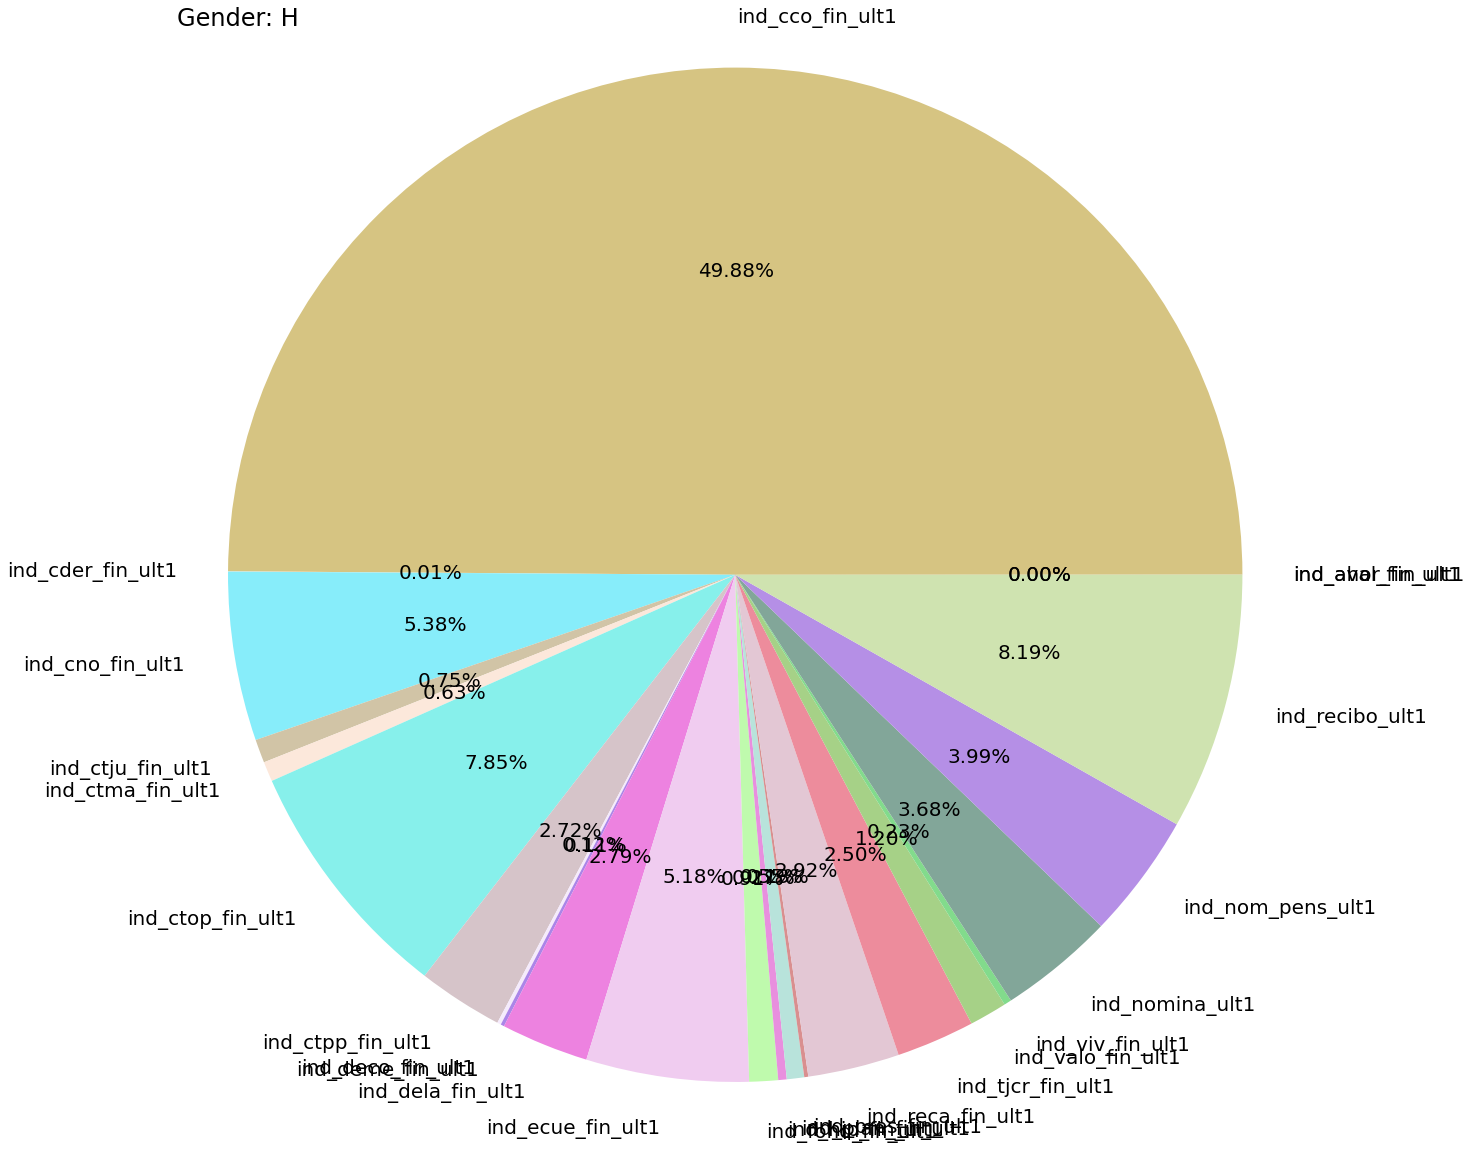

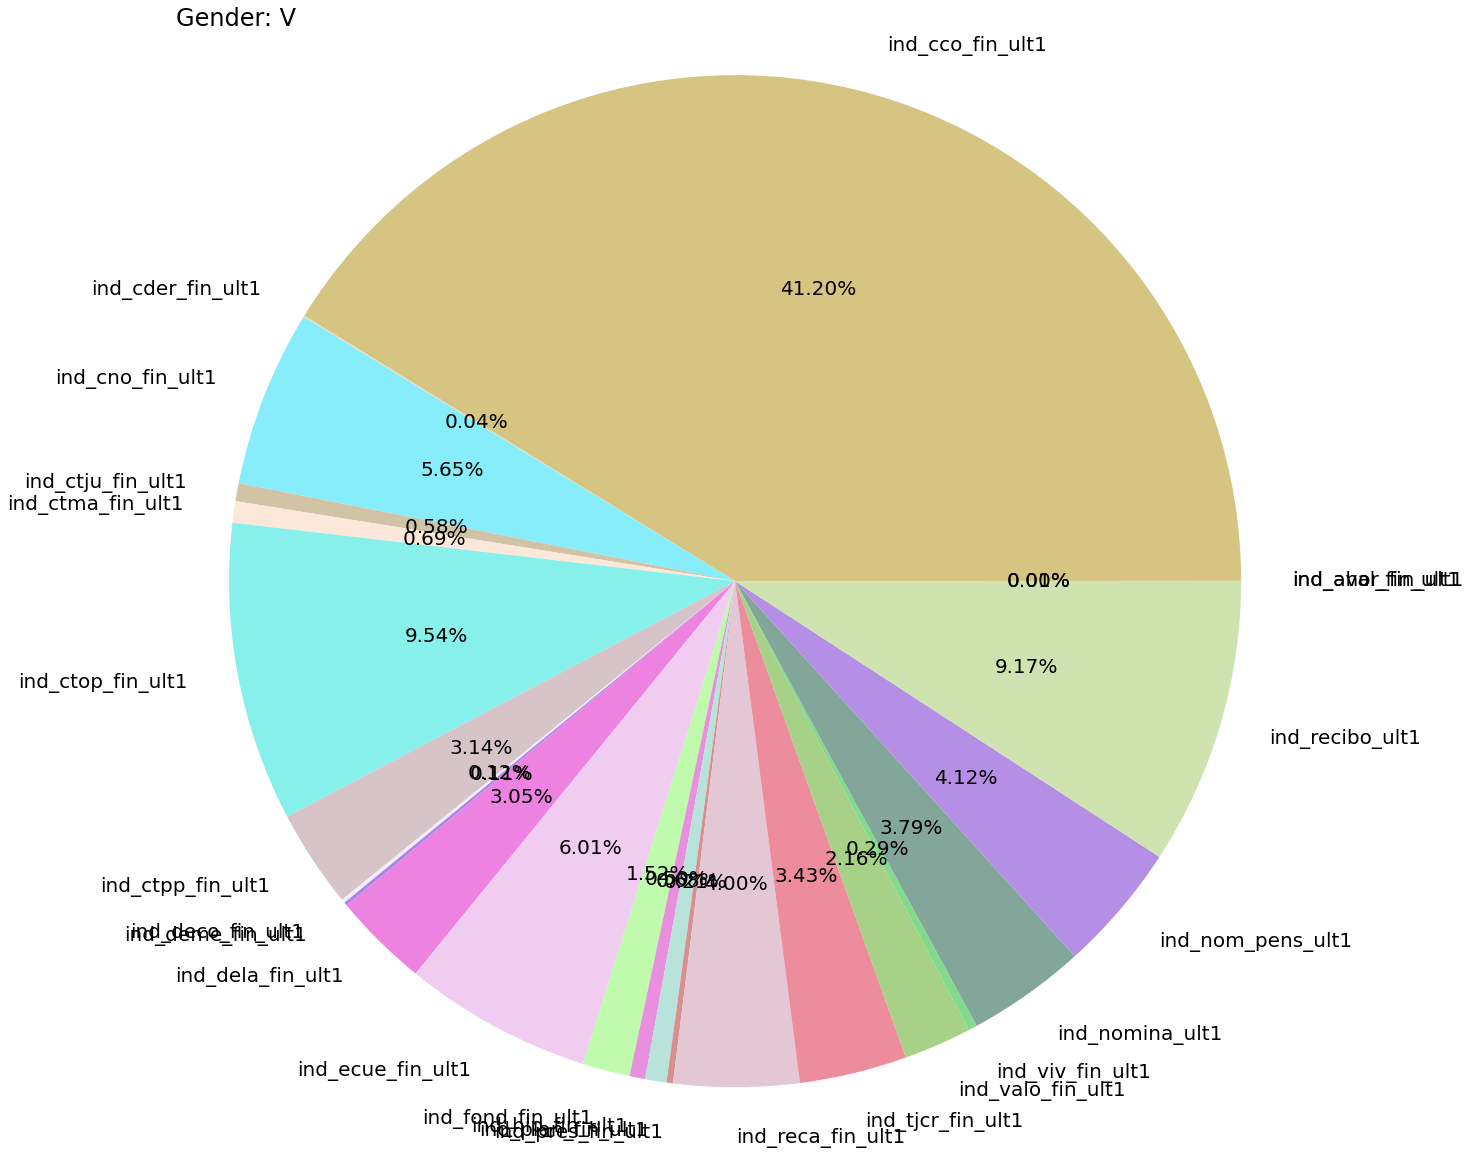

In [11]:
for s in ['H', 'V']:
    df_sum = df[df.loc[:, 'sexo'] == s].iloc[:,24:].sum()
    plt.figure(figsize = (20, 20))
    plt.pie(df_sum, labels = df_sum.index, autopct = '%1.2f%%', colors = colors, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.title("Gender: " + s, fontsize=24, loc = 'left')
    #plt.savefig("pie_chart_sexo" + s + ".jpg")

### pie chart for different empleado

There is a Nan...


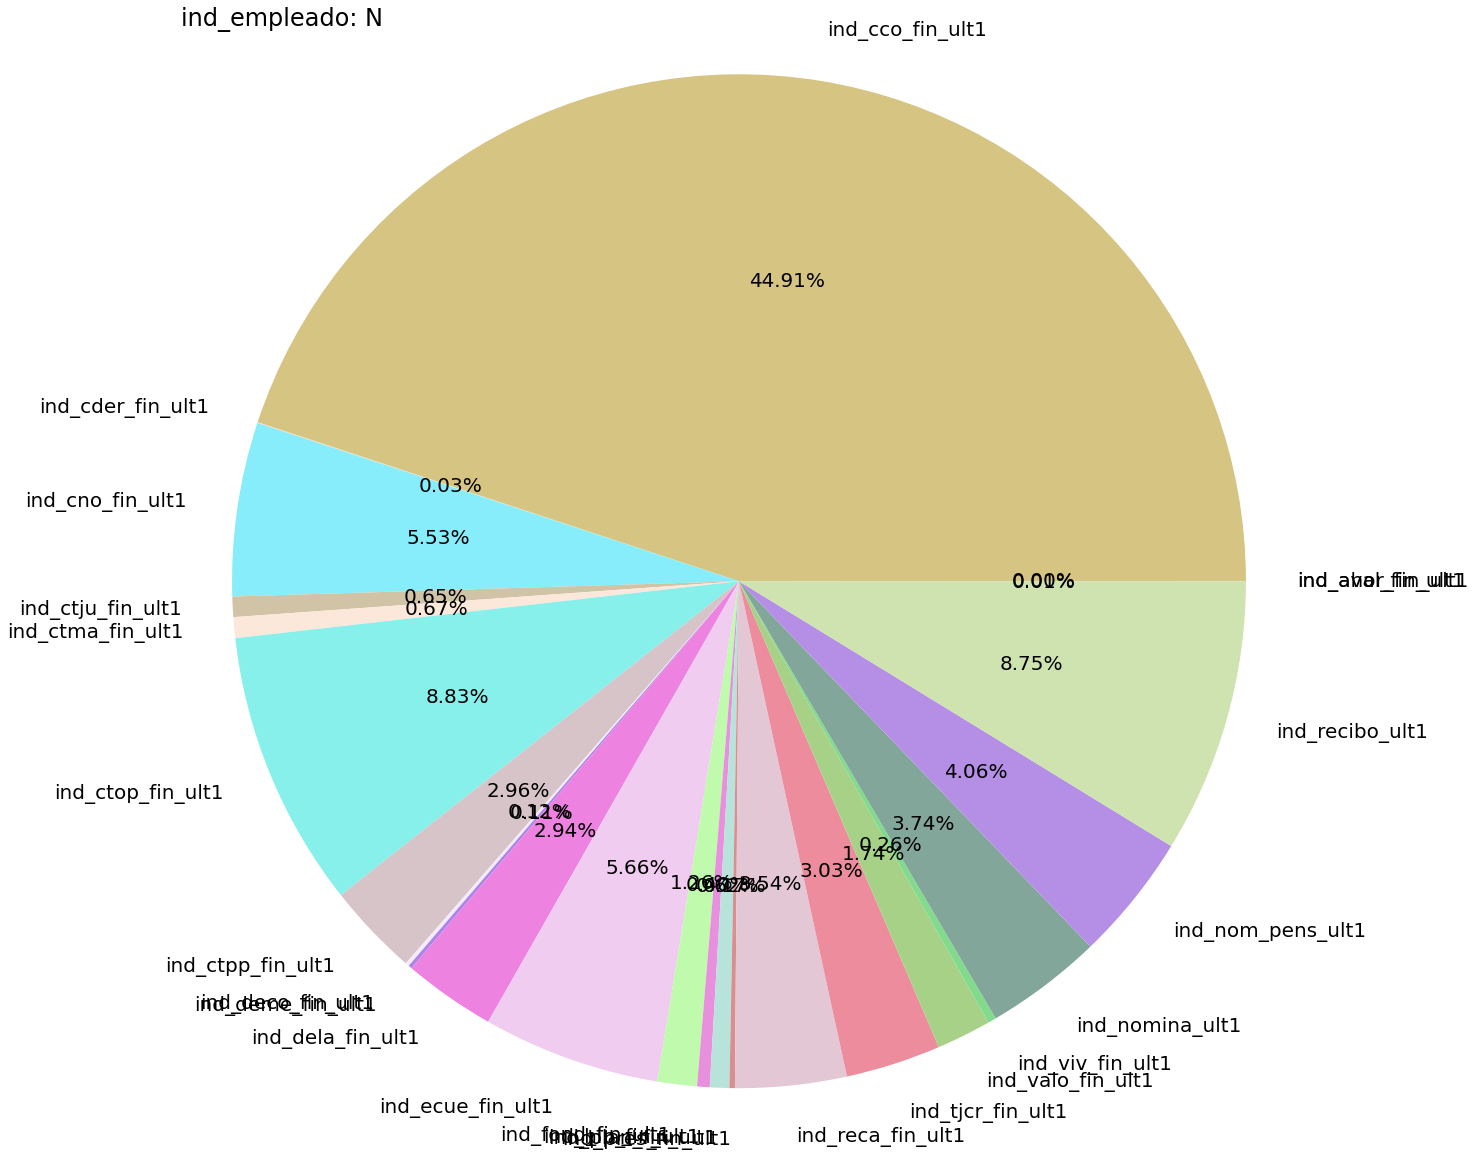

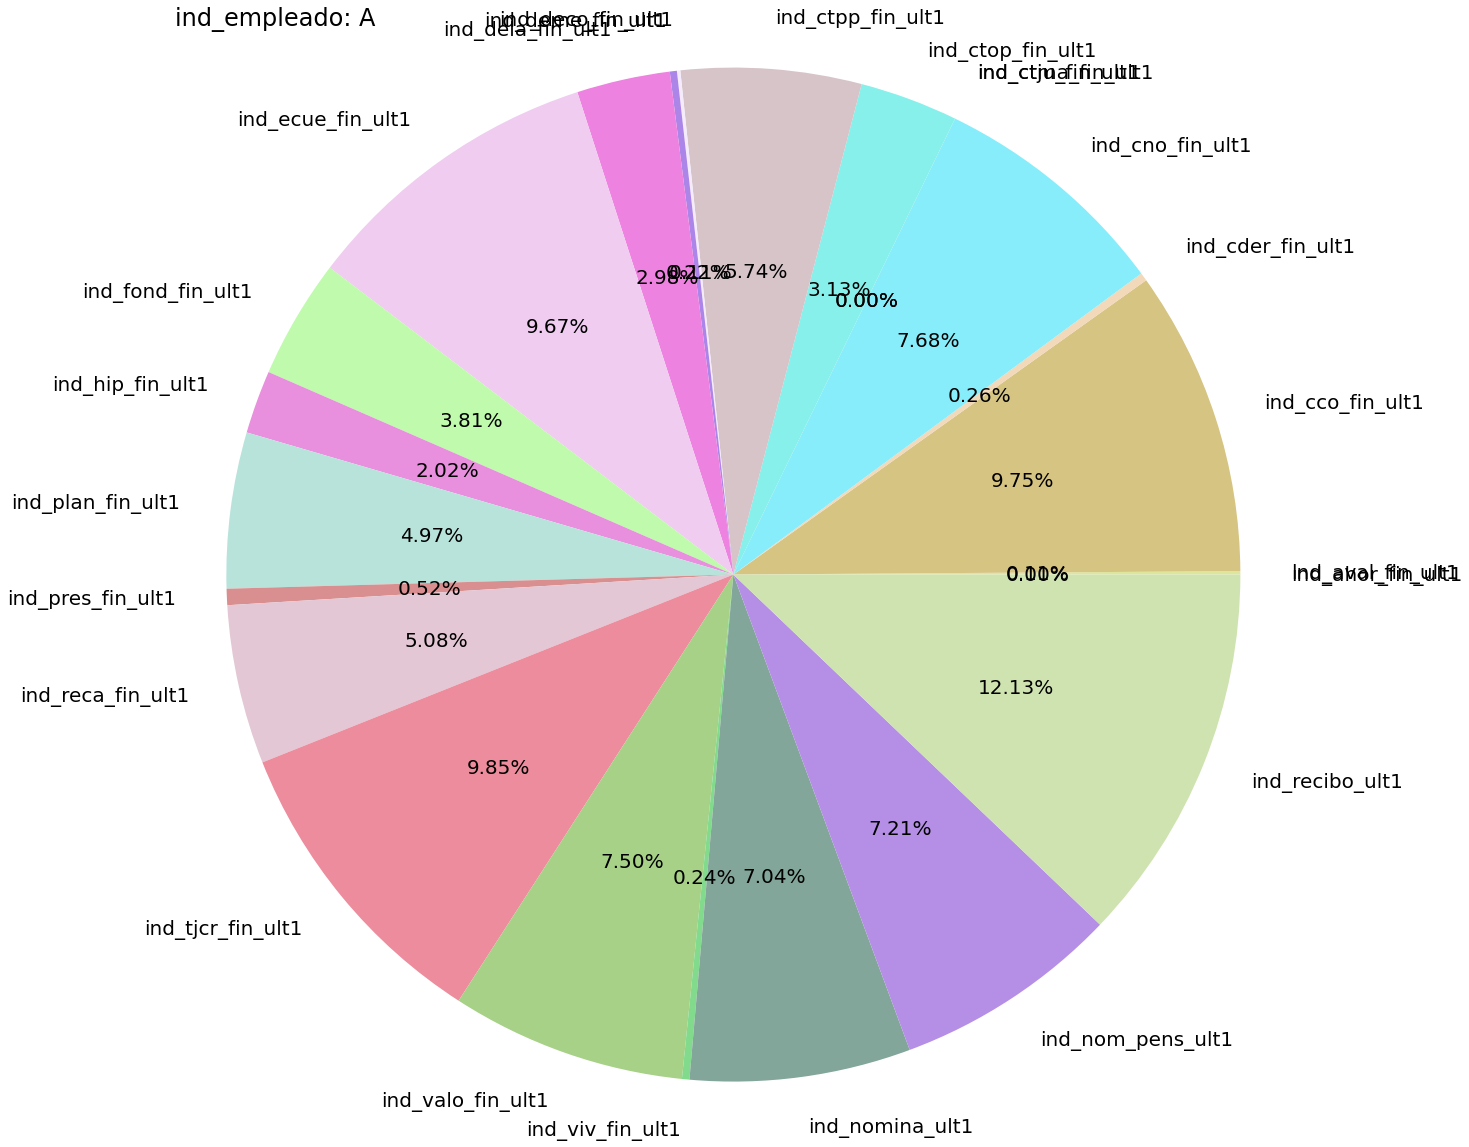

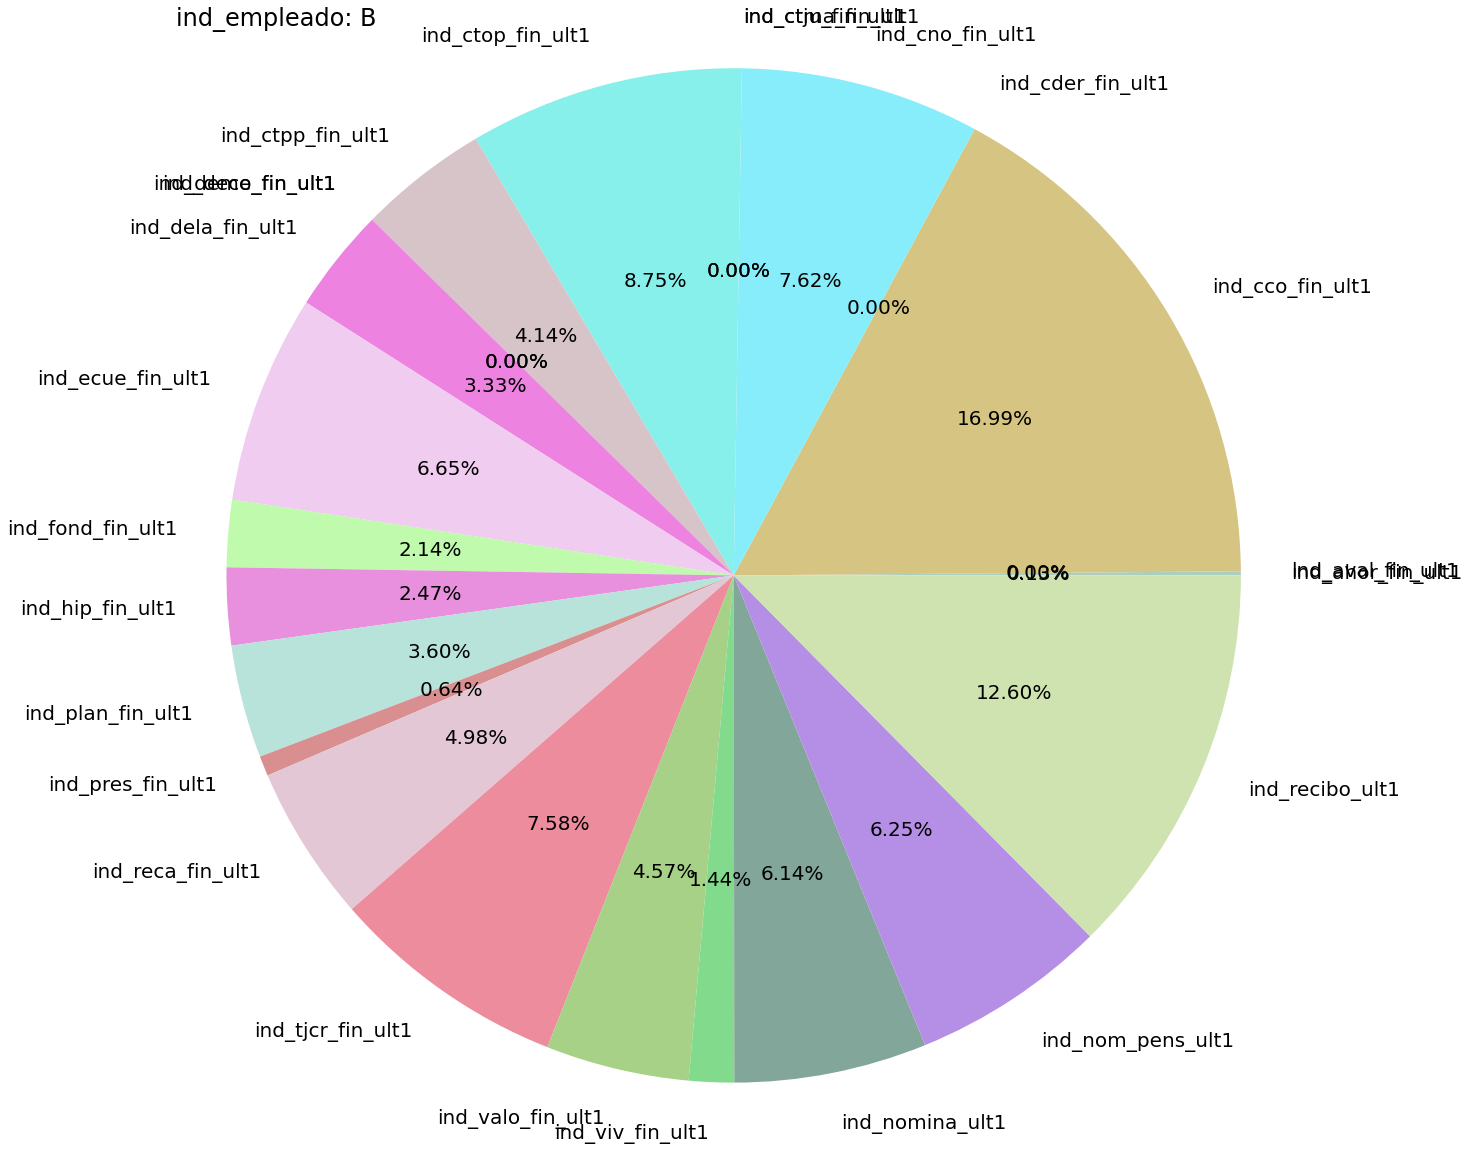

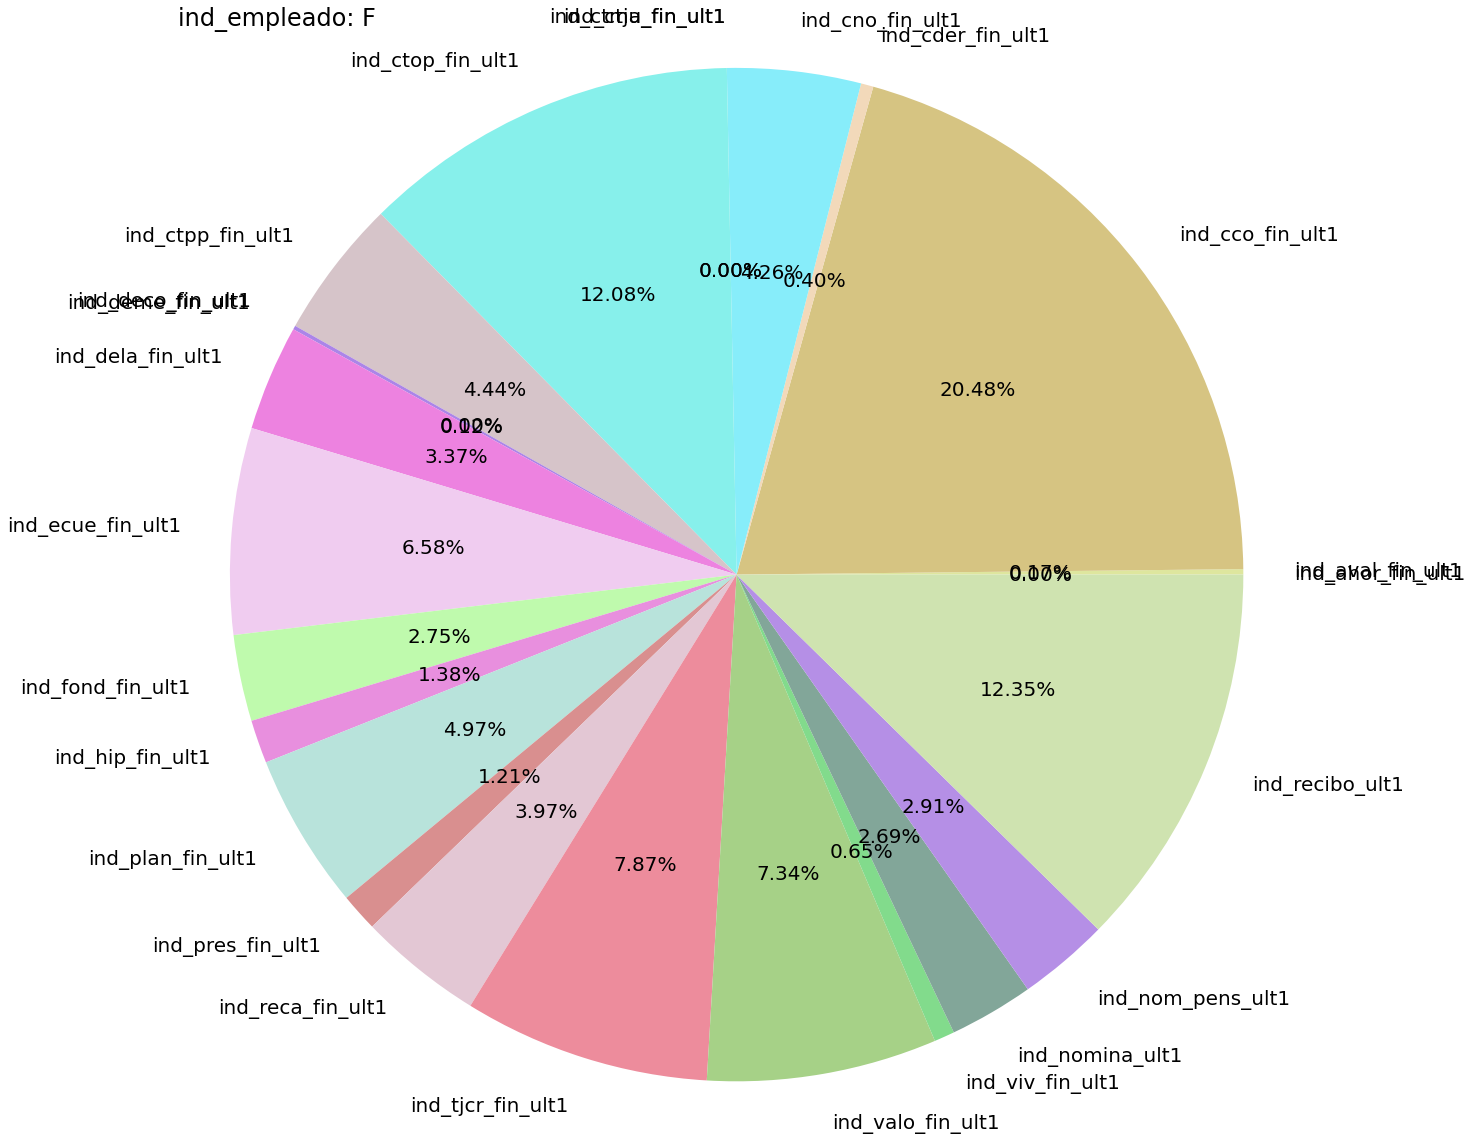

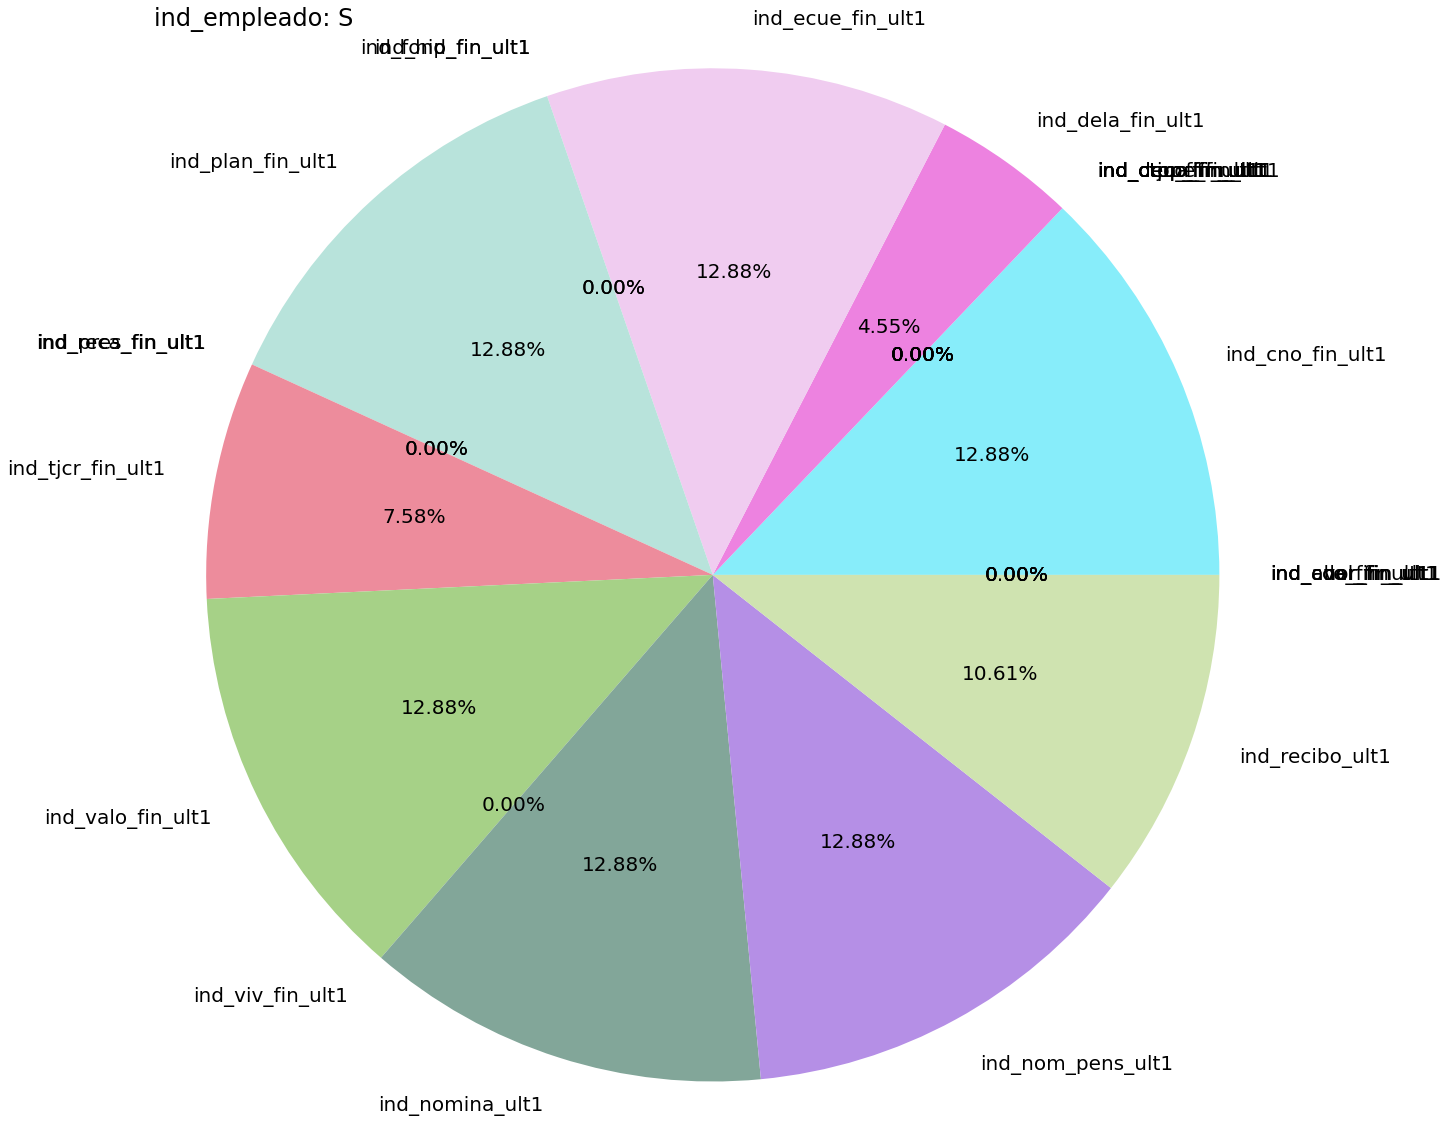

In [12]:
for emp in df.loc[:, 'ind_empleado'].unique():
    if pd.isna(emp):
        print("There is a Nan...")
        continue
    df_sum = df[df.loc[:, 'ind_empleado'] == emp].iloc[:,24:].sum()
    plt.figure(figsize = (20, 20))
    plt.pie(df_sum, labels = df_sum.index, autopct = '%1.2f%%', colors = colors, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.title("ind_empleado: " + emp, fontsize=24, loc = 'left')
    #plt.savefig("pie_chart_ind_empleado_" + emp + ".jpg")

### pie chart for different segmento

There is a Nan...


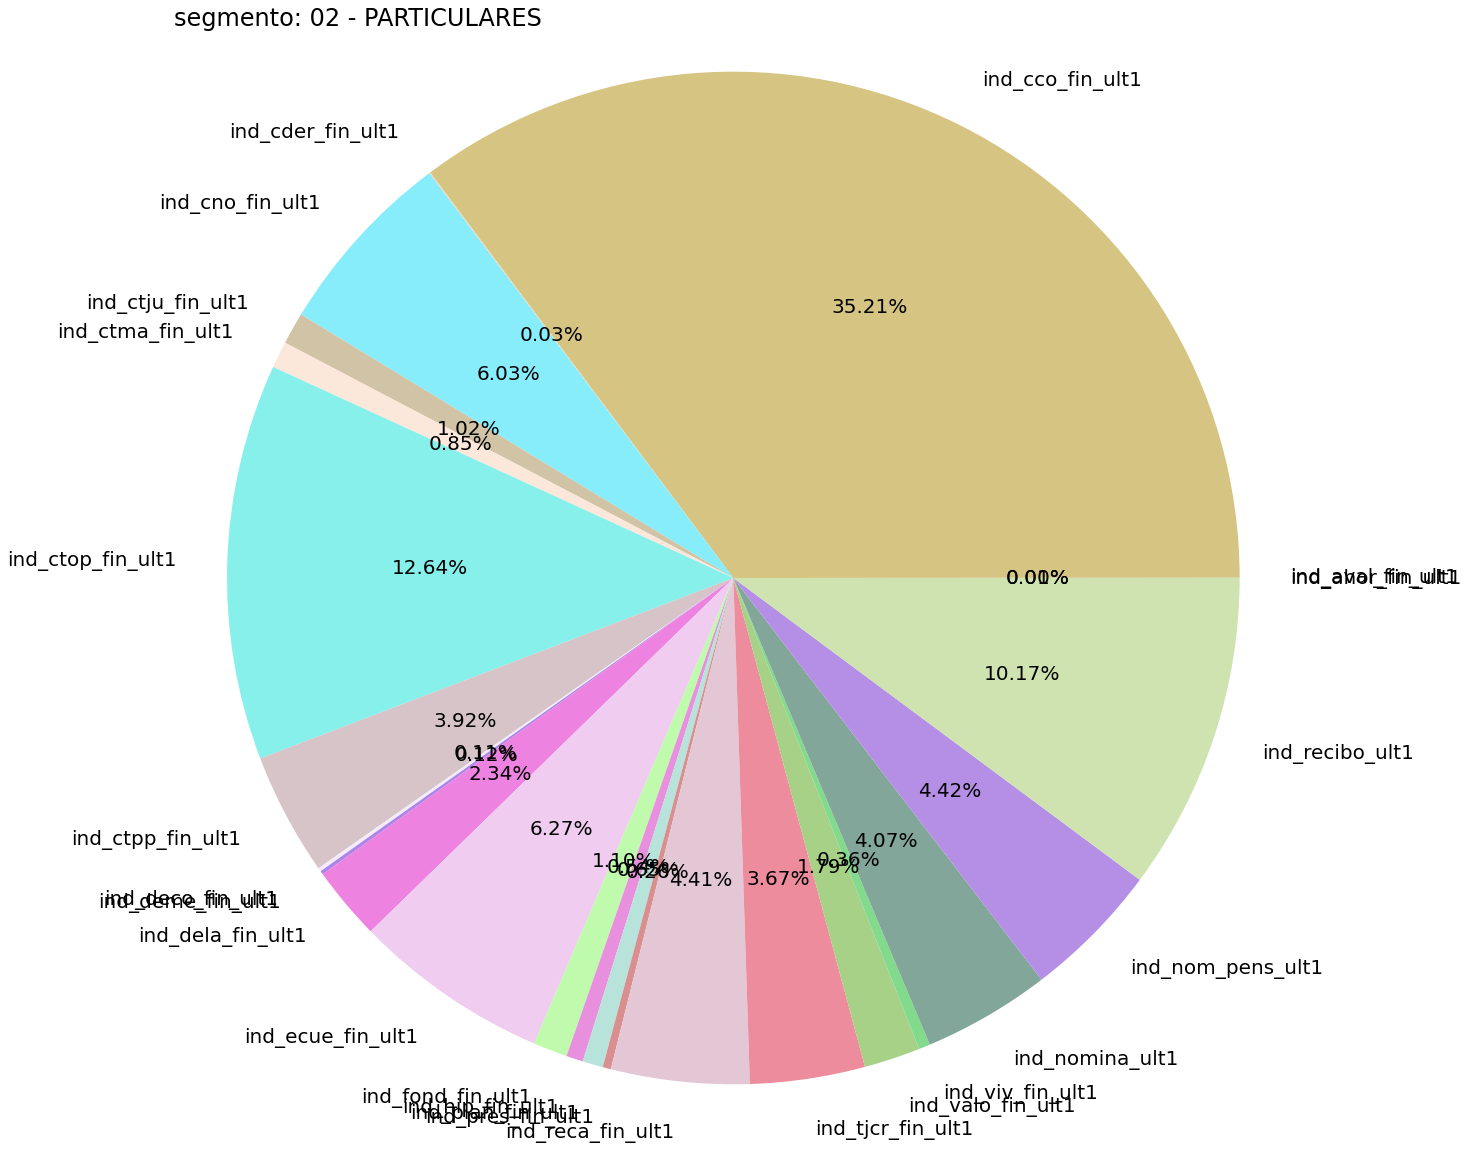

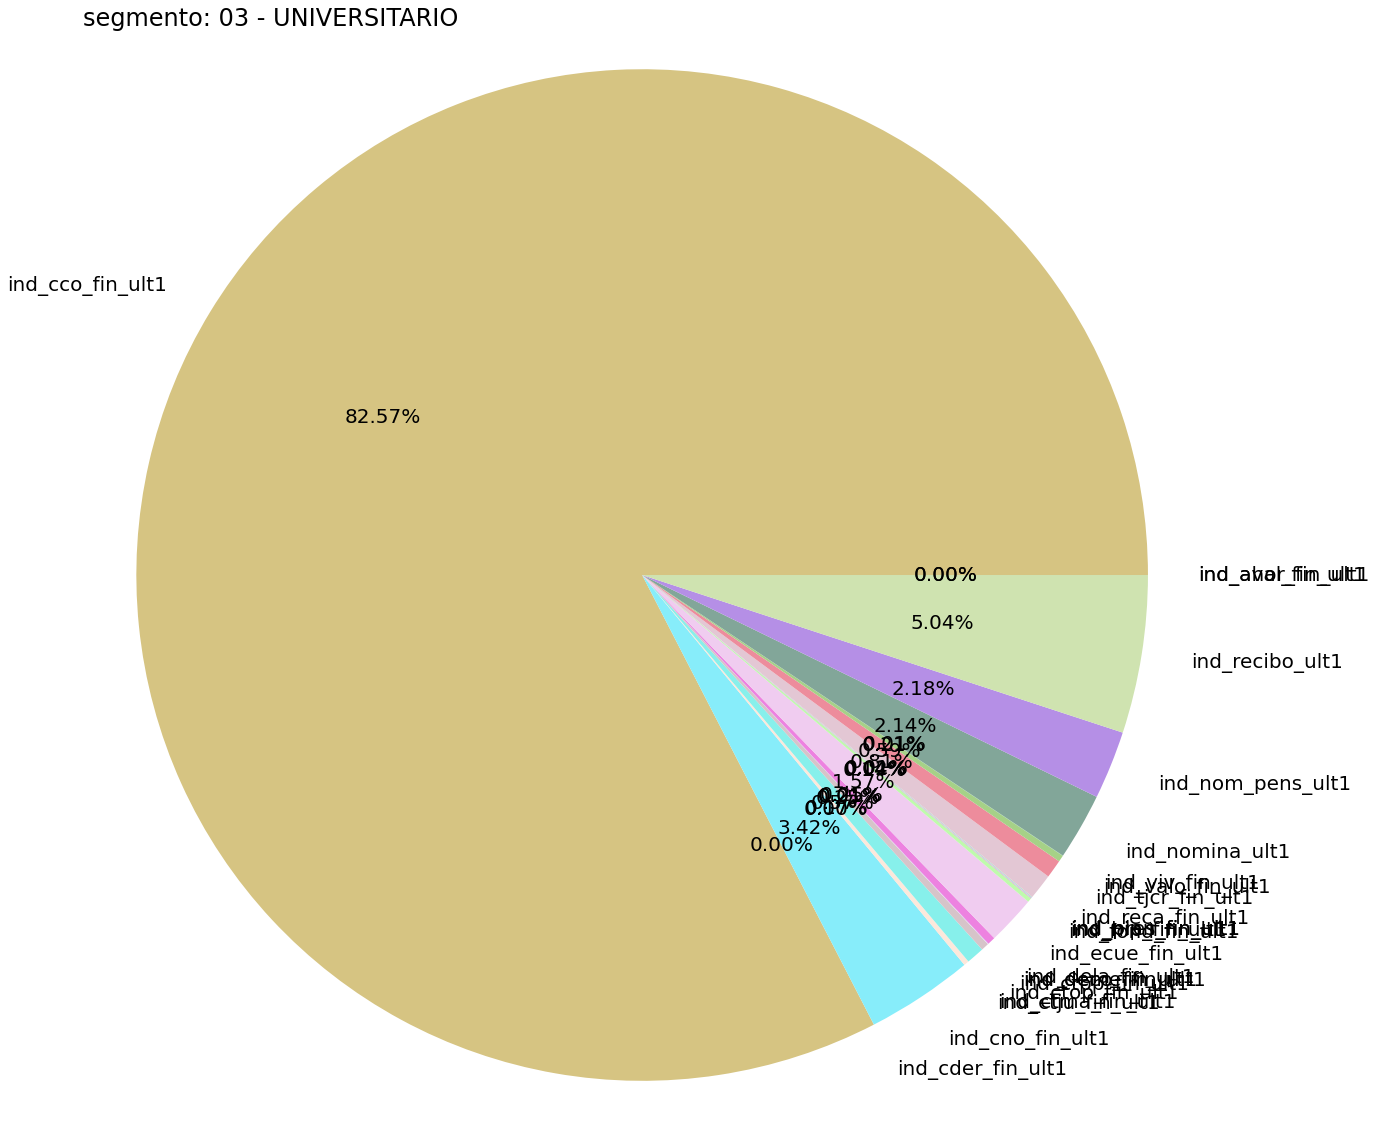

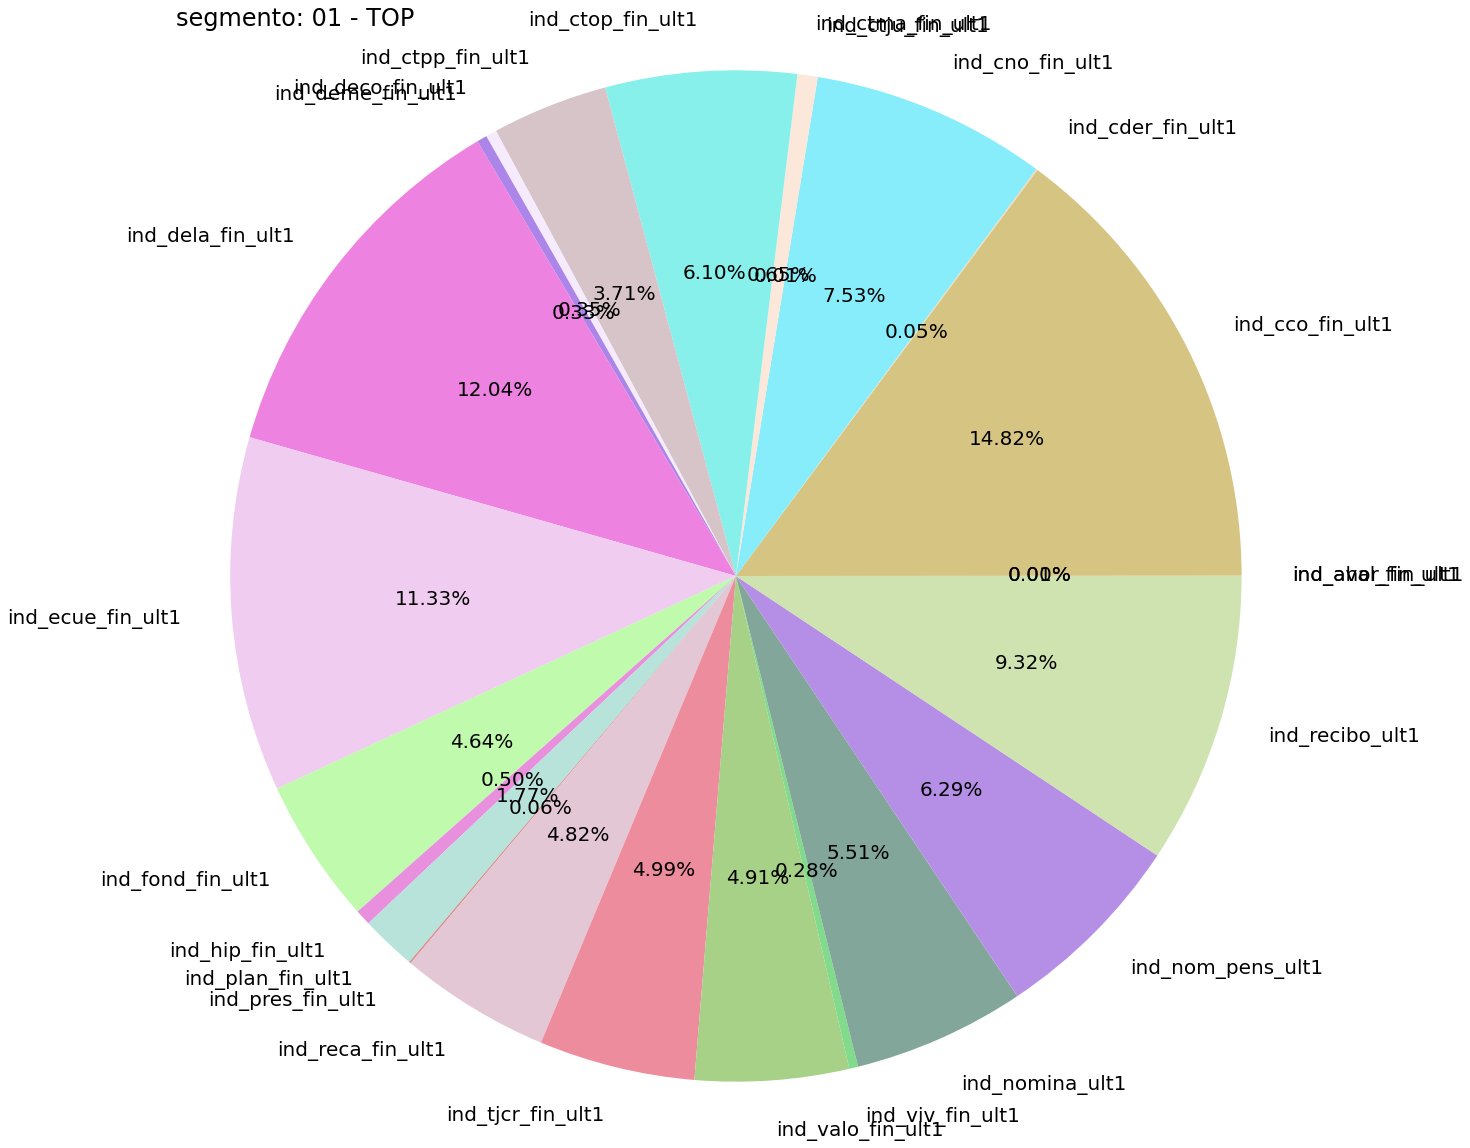

In [13]:
for seg in df.loc[:, 'segmento'].unique():
    if pd.isna(seg):
        print("There is a Nan...")
        continue
    df_sum = df[df.loc[:, 'segmento'] == seg].iloc[:,24:].sum()
    plt.figure(figsize = (20, 20))
    plt.pie(df_sum, labels = df_sum.index, autopct = '%1.2f%%', colors = colors, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.title("segmento: " + seg, fontsize=24, loc = 'left')
    #plt.savefig("pie_chart_segmento_" + seg + ".jpg")

### pie chart for pais_residencia

In [ ]:
for res in df.loc[:, 'pais_residencia'].unique():
    if pd.isna(res):
        print("There is a Nan...")
        continue
    df_sum = df[df.loc[:, 'pais_residencia'] == res].iloc[:,24:].sum()
    plt.figure(figsize = (8, 8))
    plt.pie(df_sum, labels = df_sum.index, autopct = '%1.2f%%', colors = colors, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.title("pais_residencia: " + res, fontsize=24, loc = 'left')
    plt.show()
    #plt.savefig("pie_chart_pais_residencia_" + seg + ".jpg")

### pie chart for tiprel_1mes

In [ ]:
for lme in df.loc[:, 'tiprel_1mes'].unique():
    if pd.isna(lme):
        print("There is a Nan...")
        continue
    df_sum = df[df.loc[:, 'tiprel_1mes'] == lme].iloc[:,24:].sum()
    plt.figure(figsize = (20, 20))
    plt.pie(df_sum, labels = df_sum.index, autopct = '%1.2f%%', colors = colors, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.title("tiprel_1mes: " + lme, fontsize=24, loc = 'left')
    plt.show()
    #plt.savefig("pie_chart_tiprel_1mes_" + seg + ".jpg")

### pie chart for nomprov

In [ ]:
for nom in df.loc[:, 'nomprov'].unique():
    if pd.isna(nom):
        print("There is a Nan...")
        continue
    df_sum = df[df.loc[:, 'nomprov'] == nom].iloc[:,24:].sum()
    plt.figure(figsize = (10, 10))
    plt.pie(df_sum, labels = df_sum.index, autopct = '%1.2f%%', colors = colors, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.title("nomprov: " + nom, fontsize=24, loc = 'left')
    plt.show()
    #plt.savefig("pie_chart_nomprov_" + seg + ".jpg")

### pie chart for conyuemp

In [ ]:
for i in df.loc[:, 'conyuemp'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    df_sum = df[df.loc[:, 'conyuemp'] == i].iloc[:,24:].sum()
    plt.figure(figsize = (10, 10))
    plt.pie(df_sum, labels = df_sum.index, autopct = '%1.2f%%', colors = colors, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.title("conyuemp: " + i, fontsize=24, loc = 'left')
    plt.show()
    #plt.savefig("pie_chart_nomprov_" + seg + ".jpg")

### rule for all

In [14]:
df_temp = df.iloc[:,24:]
df_temp = df_temp.fillna(0)
freq = apriori(df_temp, min_support=0.05, use_colnames=True)
result = association_rules(freq, metric="confidence", min_threshold=0.66)
#print("@For all ")
#print(result.sort_values(by = ['confidence'],ascending=False))
result.sort_values(by = ['confidence'],ascending=False).to_csv("all" + "_0.05_0.66.csv")

In [15]:
temp = pd.read_csv("all" + "_0.05_0.66.csv")
temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
cols = ['antecedents','consequents']
temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
print("For all: ")
pd.set_option('display.max_colwidth', 100)
display(temp.head(20))

For all: 


antecedents                          consequents  \
0                       ind_nomina_ult1                    ind_nom_pens_ult1   
1     ind_nomina_ult1, ind_cno_fin_ult1                    ind_nom_pens_ult1   
2                       ind_nomina_ult1                     ind_cno_fin_ult1   
3    ind_nomina_ult1, ind_nom_pens_ult1                     ind_cno_fin_ult1   
4                       ind_nomina_ult1  ind_nom_pens_ult1, ind_cno_fin_ult1   
5                     ind_nom_pens_ult1                     ind_cno_fin_ult1   
6   ind_nom_pens_ult1, ind_cno_fin_ult1                      ind_nomina_ult1   
7                     ind_nom_pens_ult1                      ind_nomina_ult1   
8                     ind_nom_pens_ult1    ind_nomina_ult1, ind_cno_fin_ult1   
9                      ind_cno_fin_ult1                      ind_recibo_ult1   
10                     ind_cno_fin_ult1                    ind_nom_pens_ult1   
11                    ind_ctop_fin_ult1                     ind_cco_fin_ult1   

    confidence  
0     1.000000  
1     1.000000  
2     0.940191  
3     0.940191  
4     0.940191  
5     0.938339  
6     0.922661  
7     0.920843  
8     0.865768  
9     0.731040  
10    0.688764  
11    0.660173

### 分segmento算

In [16]:
for seg in df.loc[:, 'segmento'].unique():
    if pd.isna(seg):
        print("There is a Nan...")
        continue
    df_temp = df[df.loc[:, 'segmento'] == seg]
    df_temp = df_temp.iloc[:,24:]
    df_temp = df_temp.fillna(0)
    freq = apriori(df_temp, min_support=0.025, use_colnames=True)
    result = association_rules(freq, metric="confidence", min_threshold=0.75)
    #print("@segmento " + seg)
    #print(result.sort_values(by = ['confidence'],ascending=False))
    result.sort_values(by = ['confidence'],ascending=False).to_csv("segmento_" + seg + "_0.025_0.75.csv")

There is a Nan...


In [17]:
for seg in df.loc[:, 'segmento'].unique():
    if pd.isna(seg):
        print("There is a Nan...")
        continue
    temp = pd.read_csv("segmento_" + seg + "_0.025_0.75.csv")
    temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
    cols = ['antecedents','consequents']
    temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
    print("For segmento: " + seg)
    pd.set_option('display.max_colwidth', 100)
    display(temp.head(20))

For segmento: 02 - PARTICULARES


antecedents  \
0                      ind_nomina_ult1, ind_cno_fin_ult1   
1                                        ind_nomina_ult1   
2     ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
3                       ind_nomina_ult1, ind_recibo_ult1   
4                       ind_nomina_ult1, ind_recibo_ult1   
5    ind_nom_pens_ult1, ind_nomina_ult1, ind_recibo_ult1   
6                       ind_nomina_ult1, ind_recibo_ult1   
7                     ind_nom_pens_ult1, ind_recibo_ult1   
8                                        ind_nomina_ult1   
9                     ind_nomina_ult1, ind_nom_pens_ult1   
10                                       ind_nomina_ult1   
11                                     ind_nom_pens_ult1   
12  ind_nom_pens_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
13                    ind_nom_pens_ult1, ind_recibo_ult1   
14                   ind_nom_pens_ult1, ind_cno_fin_ult1   
15                                     ind_nom_pens_ult1   
16                   ind_reca_fin_ult1, ind_cno_fin_ult1   
17                   ind_cno_fin_ult1, ind_tjcr_fin_ult1   
18                    ind_nom_pens_ult1, ind_recibo_ult1   
19                                     ind_nom_pens_ult1   

                            consequents  confidence  
0                     ind_nom_pens_ult1    1.000000  
1                     ind_nom_pens_ult1    1.000000  
2                     ind_nom_pens_ult1    1.000000  
3                     ind_nom_pens_ult1    1.000000  
4   ind_nom_pens_ult1, ind_cno_fin_ult1    0.949291  
5                      ind_cno_fin_ult1    0.949291  
6                      ind_cno_fin_ult1    0.949291  
7                      ind_cno_fin_ult1    0.947589  
8   ind_nom_pens_ult1, ind_cno_fin_ult1    0.941503  
9                      ind_cno_fin_ult1    0.941503  
10                     ind_cno_fin_ult1    0.941503  
11                     ind_cno_fin_ult1    0.939033  
12                      ind_nomina_ult1    0.927312  
13                      ind_nomina_ult1    0.925649  
14                      ind_nomina_ult1    0.923826  
15                      ind_nomina_ult1    0.921402  
16                      ind_recibo_ult1    0.888421  
17                      ind_recibo_ult1    0.884088  
18    ind_nomina_ult1, ind_cno_fin_ult1    0.878711  
19    ind_nomina_ult1, ind_cno_fin_ult1    0.867503

For segmento: 03 - UNIVERSITARIO


Empty DataFrame
Columns: [antecedents, consequents, confidence]
Index: []

There is a Nan...
For segmento: 01 - TOP


antecedents  \
0    ind_reca_fin_ult1, ind_valo_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1   
1    ind_ecue_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1, ind_tjcr_fin_ult1   
2     ind_dela_fin_ult1, ind_nomina_ult1, ind_recibo_ult1, ind_tjcr_fin_ult1   
3                       ind_cno_fin_ult1, ind_nomina_ult1, ind_ctop_fin_ult1   
4     ind_dela_fin_ult1, ind_nomina_ult1, ind_reca_fin_ult1, ind_recibo_ult1   
5     ind_dela_fin_ult1, ind_ecue_fin_ult1, ind_nomina_ult1, ind_recibo_ult1   
6   ind_dela_fin_ult1, ind_ecue_fin_ult1, ind_nomina_ult1, ind_tjcr_fin_ult1   
7   ind_dela_fin_ult1, ind_ecue_fin_ult1, ind_nomina_ult1, ind_reca_fin_ult1   
8     ind_ctpp_fin_ult1, ind_nomina_ult1, ind_recibo_ult1, ind_tjcr_fin_ult1   
9     ind_ctpp_fin_ult1, ind_nomina_ult1, ind_reca_fin_ult1, ind_recibo_ult1   
10    ind_ctpp_fin_ult1, ind_ecue_fin_ult1, ind_nomina_ult1, ind_recibo_ult1   
11     ind_valo_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
12                      ind_ctpp_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1   
13     ind_recibo_ult1, ind_nomina_ult1, ind_cno_fin_ult1, ind_tjcr_fin_ult1   
14   ind_valo_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1, ind_tjcr_fin_ult1   
15     ind_reca_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
16   ind_reca_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1, ind_tjcr_fin_ult1   
17                      ind_dela_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1   
18     ind_plan_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
19     ind_nomina_ult1, ind_cno_fin_ult1, ind_fond_fin_ult1, ind_recibo_ult1   

          consequents  confidence  
0   ind_nom_pens_ult1         1.0  
1   ind_nom_pens_ult1         1.0  
2   ind_nom_pens_ult1         1.0  
3   ind_nom_pens_ult1         1.0  
4   ind_nom_pens_ult1         1.0  
5   ind_nom_pens_ult1         1.0  
6   ind_nom_pens_ult1         1.0  
7   ind_nom_pens_ult1         1.0  
8   ind_nom_pens_ult1         1.0  
9   ind_nom_pens_ult1         1.0  
10  ind_nom_pens_ult1         1.0  
11  ind_nom_pens_ult1         1.0  
12  ind_nom_pens_ult1         1.0  
13  ind_nom_pens_ult1         1.0  
14  ind_nom_pens_ult1         1.0  
15  ind_nom_pens_ult1         1.0  
16  ind_nom_pens_ult1         1.0  
17  ind_nom_pens_ult1         1.0  
18  ind_nom_pens_ult1         1.0  
19  ind_nom_pens_ult1         1.0

## Association Rules

### 分ind_empleado算

In [18]:
for emp in df.loc[:, 'ind_empleado'].unique():
    if pd.isna(emp):
        print("There is a Nan...")
        continue
    df_temp = df[df.loc[:, 'ind_empleado'] == emp]
    df_temp = df_temp.iloc[:,24:]
    df_temp = df_temp.fillna(0)
    freq = apriori(df_temp, min_support=0.025, use_colnames=True)
    result = association_rules(freq, metric="confidence", min_threshold=0.75)
    #print("@ind_empleado " + emp)
    #print(result.sort_values(by = ['confidence'],ascending=False))
    result.sort_values(by = ['confidence'],ascending=False).to_csv("ind_emplead_" + emp + "_0.025_0.75.csv")

There is a Nan...


In [19]:
for emp in df.loc[:, 'ind_empleado'].unique():
    if pd.isna(emp):
        print("There is a Nan...")
        continue
    temp = pd.read_csv("ind_emplead_" + emp + "_0.025_0.75.csv")
    temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
    cols = ['antecedents','consequents']
    temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
    print("For empleado: " + emp)
    pd.set_option('display.max_colwidth', 150)
    display(temp.head(20))
    

For empleado: N


antecedents  \
0     ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
1                                        ind_nomina_ult1   
2                       ind_nomina_ult1, ind_recibo_ult1   
3                      ind_nomina_ult1, ind_cno_fin_ult1   
4    ind_nom_pens_ult1, ind_nomina_ult1, ind_recibo_ult1   
5                       ind_nomina_ult1, ind_recibo_ult1   
6                       ind_nomina_ult1, ind_recibo_ult1   
7                     ind_nom_pens_ult1, ind_recibo_ult1   
8                                        ind_nomina_ult1   
9                     ind_nomina_ult1, ind_nom_pens_ult1   
10                                       ind_nomina_ult1   
11                                     ind_nom_pens_ult1   
12  ind_nom_pens_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
13                    ind_nom_pens_ult1, ind_recibo_ult1   
14                   ind_nom_pens_ult1, ind_cno_fin_ult1   
15                                     ind_nom_pens_ult1   
16                    ind_nom_pens_ult1, ind_recibo_ult1   
17                                     ind_nom_pens_ult1   
18  ind_nomina_ult1, ind_cno_fin_ult1, ind_nom_pens_ult1   
19                     ind_nomina_ult1, ind_cno_fin_ult1   

                            consequents  confidence  
0                     ind_nom_pens_ult1    1.000000  
1                     ind_nom_pens_ult1    1.000000  
2                     ind_nom_pens_ult1    1.000000  
3                     ind_nom_pens_ult1    1.000000  
4                      ind_cno_fin_ult1    0.949369  
5   ind_nom_pens_ult1, ind_cno_fin_ult1    0.949369  
6                      ind_cno_fin_ult1    0.949369  
7                      ind_cno_fin_ult1    0.947915  
8                      ind_cno_fin_ult1    0.940461  
9                      ind_cno_fin_ult1    0.940461  
10  ind_nom_pens_ult1, ind_cno_fin_ult1    0.940461  
11                     ind_cno_fin_ult1    0.938592  
12                      ind_nomina_ult1    0.924140  
13                      ind_nomina_ult1    0.922725  
14                      ind_nomina_ult1    0.922537  
15                      ind_nomina_ult1    0.920704  
16    ind_nomina_ult1, ind_cno_fin_ult1    0.876006  
17    ind_nomina_ult1, ind_cno_fin_ult1    0.865886  
18                      ind_recibo_ult1    0.789280  
19   ind_nom_pens_ult1, ind_recibo_ult1    0.789280

There is a Nan...
For empleado: A


antecedents  \
0                      ind_cco_fin_ult1, ind_cno_fin_ult1, ind_fond_fin_ult1, ind_tjcr_fin_ult1, ind_plan_fin_ult1   
1                        ind_cco_fin_ult1, ind_cno_fin_ult1, ind_ctop_fin_ult1, ind_tjcr_fin_ult1, ind_nomina_ult1   
2                                         ind_hip_fin_ult1, ind_ecue_fin_ult1, ind_cco_fin_ult1, ind_tjcr_fin_ult1   
3                                         ind_hip_fin_ult1, ind_ecue_fin_ult1, ind_cco_fin_ult1, ind_nom_pens_ult1   
4     ind_ctpp_fin_ult1, ind_cco_fin_ult1, ind_cno_fin_ult1, ind_fond_fin_ult1, ind_nom_pens_ult1, ind_nomina_ult1   
5                                           ind_hip_fin_ult1, ind_nomina_ult1, ind_ecue_fin_ult1, ind_cco_fin_ult1   
6   ind_ctpp_fin_ult1, ind_cco_fin_ult1, ind_cno_fin_ult1, ind_fond_fin_ult1, ind_nom_pens_ult1, ind_ecue_fin_ult1   
7                        ind_cco_fin_ult1, ind_cno_fin_ult1, ind_ctop_fin_ult1, ind_valo_fin_ult1, ind_nomina_ult1   
8                                           ind_hip_fin_ult1, ind_nomina_ult1, ind_ecue_fin_ult1, ind_cco_fin_ult1   
9       ind_cco_fin_ult1, ind_cno_fin_ult1, ind_ctop_fin_ult1, ind_valo_fin_ult1, ind_nomina_ult1, ind_recibo_ult1   
10    ind_cco_fin_ult1, ind_cno_fin_ult1, ind_ctop_fin_ult1, ind_nom_pens_ult1, ind_valo_fin_ult1, ind_nomina_ult1   
11                                        ind_hip_fin_ult1, ind_ecue_fin_ult1, ind_cco_fin_ult1, ind_nom_pens_ult1   
12                                         ind_nomina_ult1, ind_plan_fin_ult1, ind_cco_fin_ult1, ind_fond_fin_ult1   
13    ind_dela_fin_ult1, ind_cco_fin_ult1, ind_cno_fin_ult1, ind_nom_pens_ult1, ind_valo_fin_ult1, ind_recibo_ult1   
14      ind_cco_fin_ult1, ind_cno_fin_ult1, ind_ctop_fin_ult1, ind_tjcr_fin_ult1, ind_nomina_ult1, ind_recibo_ult1   
15                                        ind_ecue_fin_ult1, ind_plan_fin_ult1, ind_nomina_ult1, ind_reca_fin_ult1   
16    ind_cco_fin_ult1, ind_cno_fin_ult1, ind_ctop_fin_ult1, ind_nom_pens_ult1, ind_tjcr_fin_ult1, ind_nomina_ult1   
17                      ind_cco_fin_ult1, ind_fond_fin_ult1, ind_tjcr_fin_ult1, ind_valo_fin_ult1, ind_nomina_ult1   
18  ind_cco_fin_ult1, ind_cno_fin_ult1, ind_ctop_fin_ult1, ind_nom_pens_ult1, ind_tjcr_fin_ult1, ind_valo_fin_ult1   
19    ind_cco_fin_ult1, ind_cno_fin_ult1, ind_ctop_fin_ult1, ind_tjcr_fin_ult1, ind_valo_fin_ult1, ind_nomina_ult1   

                           consequents  confidence  
0                      ind_recibo_ult1         1.0  
1   ind_nom_pens_ult1, ind_recibo_ult1         1.0  
2                      ind_recibo_ult1         1.0  
3                      ind_nomina_ult1         1.0  
4                    ind_ecue_fin_ult1         1.0  
5                    ind_nom_pens_ult1         1.0  
6                      ind_nomina_ult1         1.0  
7   ind_nom_pens_ult1, ind_recibo_ult1         1.0  
8                      ind_recibo_ult1         1.0  
9                    ind_nom_pens_ult1         1.0  
10                     ind_recibo_ult1         1.0  
11                     ind_recibo_ult1         1.0  
12  ind_nom_pens_ult1, ind_recibo_ult1         1.0  
13                     ind_nomina_ult1         1.0  
14                   ind_nom_pens_ult1         1.0  
15                   ind_nom_pens_ult1         1.0  
16                     ind_recibo_ult1         1.0  
17                   ind_nom_pens_ult1         1.0  
18                     ind_recibo_ult1         1.0  
19                     ind_recibo_ult1         1.0

For empleado: B


antecedents  \
0   ind_ctpp_fin_ult1, ind_cno_fin_ult1, ind_ctop_fin_ult1, ind_nom_pens_ult1, ind_nomina_ult1   
1                      ind_ecue_fin_ult1, ind_plan_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1   
2    ind_cco_fin_ult1, ind_cno_fin_ult1, ind_reca_fin_ult1, ind_tjcr_fin_ult1, ind_recibo_ult1   
3                                          ind_hip_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1   
4                                        ind_valo_fin_ult1, ind_ecue_fin_ult1, ind_nomina_ult1   
5                                        ind_hip_fin_ult1, ind_nom_pens_ult1, ind_cno_fin_ult1   
6                    ind_dela_fin_ult1, ind_nom_pens_ult1, ind_cno_fin_ult1, ind_tjcr_fin_ult1   
7    ind_hip_fin_ult1, ind_cno_fin_ult1, ind_nom_pens_ult1, ind_reca_fin_ult1, ind_nomina_ult1   
8                                          ind_hip_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1   
9    ind_hip_fin_ult1, ind_cno_fin_ult1, ind_nom_pens_ult1, ind_reca_fin_ult1, ind_recibo_ult1   
10                     ind_dela_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1, ind_tjcr_fin_ult1   
11     ind_hip_fin_ult1, ind_cno_fin_ult1, ind_reca_fin_ult1, ind_nomina_ult1, ind_recibo_ult1   
12                                       ind_hip_fin_ult1, ind_nom_pens_ult1, ind_cno_fin_ult1   
13                     ind_dela_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1, ind_tjcr_fin_ult1   
14                   ind_dela_fin_ult1, ind_nom_pens_ult1, ind_cno_fin_ult1, ind_tjcr_fin_ult1   
15                   ind_reca_fin_ult1, ind_dela_fin_ult1, ind_cno_fin_ult1, ind_tjcr_fin_ult1   
16                                      ind_reca_fin_ult1, ind_plan_fin_ult1, ind_cno_fin_ult1   
17                   ind_dela_fin_ult1, ind_ecue_fin_ult1, ind_nom_pens_ult1, ind_cno_fin_ult1   
18                    ind_reca_fin_ult1, ind_hip_fin_ult1, ind_nom_pens_ult1, ind_cno_fin_ult1   
19                      ind_reca_fin_ult1, ind_hip_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1   

                                             consequents  confidence  
0                                        ind_recibo_ult1         1.0  
1                                      ind_nom_pens_ult1         1.0  
2                     ind_nomina_ult1, ind_nom_pens_ult1         1.0  
3                                      ind_nom_pens_ult1         1.0  
4   ind_nom_pens_ult1, ind_cno_fin_ult1, ind_recibo_ult1         1.0  
5                                        ind_nomina_ult1         1.0  
6                                        ind_recibo_ult1         1.0  
7                                        ind_recibo_ult1         1.0  
8                                        ind_recibo_ult1         1.0  
9                                        ind_nomina_ult1         1.0  
10                                       ind_recibo_ult1         1.0  
11                                     ind_nom_pens_ult1         1.0  
12                                       ind_recibo_ult1         1.0  
13                                     ind_nom_pens_ult1         1.0  
14                                       ind_nomina_ult1         1.0  
15                                       ind_recibo_ult1         1.0  
16                                       ind_recibo_ult1         1.0  
17                                       ind_recibo_ult1         1.0  
18                      ind_nomina_ult1, ind_recibo_ult1         1.0  
19                    ind_nom_pens_ult1, ind_recibo_ult1         1.0

For empleado: F


antecedents  \
0      ind_recibo_ult1, ind_nomina_ult1, ind_cno_fin_ult1, ind_tjcr_fin_ult1   
1    ind_valo_fin_ult1, ind_cco_fin_ult1, ind_recibo_ult1, ind_nom_pens_ult1   
2                     ind_ctpp_fin_ult1, ind_nom_pens_ult1, ind_cno_fin_ult1   
3                       ind_ctpp_fin_ult1, ind_nomina_ult1, ind_cno_fin_ult1   
4                     ind_ctpp_fin_ult1, ind_valo_fin_ult1, ind_cno_fin_ult1   
5                     ind_ctpp_fin_ult1, ind_cno_fin_ult1, ind_tjcr_fin_ult1   
6                     ind_reca_fin_ult1, ind_ctpp_fin_ult1, ind_cno_fin_ult1   
7                     ind_ctpp_fin_ult1, ind_plan_fin_ult1, ind_cno_fin_ult1   
8     ind_valo_fin_ult1, ind_nomina_ult1, ind_cco_fin_ult1, ind_cno_fin_ult1   
9      ind_valo_fin_ult1, ind_nomina_ult1, ind_cco_fin_ult1, ind_recibo_ult1   
10                      ind_valo_fin_ult1, ind_nomina_ult1, ind_cco_fin_ult1   
11  ind_nomina_ult1, ind_plan_fin_ult1, ind_nom_pens_ult1, ind_tjcr_fin_ult1   
12  ind_valo_fin_ult1, ind_cco_fin_ult1, ind_cno_fin_ult1, ind_nom_pens_ult1   
13    ind_recibo_ult1, ind_plan_fin_ult1, ind_nomina_ult1, ind_tjcr_fin_ult1   
14                       ind_cno_fin_ult1, ind_nomina_ult1, ind_cco_fin_ult1   
15                    ind_valo_fin_ult1, ind_cco_fin_ult1, ind_nom_pens_ult1   
16                    ind_cno_fin_ult1, ind_nom_pens_ult1, ind_ctop_fin_ult1   
17                      ind_cno_fin_ult1, ind_nomina_ult1, ind_ctop_fin_ult1   
18                     ind_plan_fin_ult1, ind_nomina_ult1, ind_tjcr_fin_ult1   
19    ind_nomina_ult1, ind_cco_fin_ult1, ind_cno_fin_ult1, ind_nom_pens_ult1   

                           consequents  confidence  
0                    ind_nom_pens_ult1         1.0  
1                     ind_cno_fin_ult1         1.0  
2                      ind_nomina_ult1         1.0  
3                    ind_nom_pens_ult1         1.0  
4                      ind_recibo_ult1         1.0  
5                      ind_recibo_ult1         1.0  
6                      ind_recibo_ult1         1.0  
7                      ind_recibo_ult1         1.0  
8                      ind_recibo_ult1         1.0  
9                     ind_cno_fin_ult1         1.0  
10   ind_cno_fin_ult1, ind_recibo_ult1         1.0  
11                     ind_recibo_ult1         1.0  
12                     ind_recibo_ult1         1.0  
13                   ind_nom_pens_ult1         1.0  
14                     ind_recibo_ult1         1.0  
15   ind_cno_fin_ult1, ind_recibo_ult1         1.0  
16                     ind_nomina_ult1         1.0  
17                   ind_nom_pens_ult1         1.0  
18  ind_nom_pens_ult1, ind_recibo_ult1         1.0  
19                     ind_recibo_ult1         1.0

For empleado: S


antecedents  \
0                                                                             ind_dela_fin_ult1   
1                      ind_dela_fin_ult1, ind_nom_pens_ult1, ind_recibo_ult1, ind_tjcr_fin_ult1   
2                    ind_dela_fin_ult1, ind_ecue_fin_ult1, ind_nom_pens_ult1, ind_tjcr_fin_ult1   
3     ind_dela_fin_ult1, ind_tjcr_fin_ult1, ind_ecue_fin_ult1, ind_nomina_ult1, ind_recibo_ult1   
4     ind_dela_fin_ult1, ind_nom_pens_ult1, ind_tjcr_fin_ult1, ind_nomina_ult1, ind_recibo_ult1   
5   ind_dela_fin_ult1, ind_nom_pens_ult1, ind_tjcr_fin_ult1, ind_ecue_fin_ult1, ind_recibo_ult1   
6   ind_dela_fin_ult1, ind_nom_pens_ult1, ind_tjcr_fin_ult1, ind_ecue_fin_ult1, ind_nomina_ult1   
7                                                          ind_dela_fin_ult1, ind_tjcr_fin_ult1   
8                                         ind_dela_fin_ult1, ind_recibo_ult1, ind_tjcr_fin_ult1   
9                                       ind_dela_fin_ult1, ind_valo_fin_ult1, ind_tjcr_fin_ult1   
10                                      ind_dela_fin_ult1, ind_nom_pens_ult1, ind_tjcr_fin_ult1   
11                                      ind_dela_fin_ult1, ind_ecue_fin_ult1, ind_tjcr_fin_ult1   
12                     ind_dela_fin_ult1, ind_valo_fin_ult1, ind_recibo_ult1, ind_tjcr_fin_ult1   
13                     ind_dela_fin_ult1, ind_nom_pens_ult1, ind_recibo_ult1, ind_tjcr_fin_ult1   
14                   ind_dela_fin_ult1, ind_valo_fin_ult1, ind_nom_pens_ult1, ind_tjcr_fin_ult1   
15                     ind_dela_fin_ult1, ind_ecue_fin_ult1, ind_recibo_ult1, ind_tjcr_fin_ult1   
16                   ind_dela_fin_ult1, ind_valo_fin_ult1, ind_ecue_fin_ult1, ind_tjcr_fin_ult1   
17                   ind_dela_fin_ult1, ind_ecue_fin_ult1, ind_nom_pens_ult1, ind_tjcr_fin_ult1   
18  ind_dela_fin_ult1, ind_nom_pens_ult1, ind_tjcr_fin_ult1, ind_valo_fin_ult1, ind_recibo_ult1   
19  ind_dela_fin_ult1, ind_ecue_fin_ult1, ind_tjcr_fin_ult1, ind_valo_fin_ult1, ind_recibo_ult1   

                                                                 consequents  \
0                                                           ind_cno_fin_ult1   
1                                         ind_ecue_fin_ult1, ind_nomina_ult1   
2                                           ind_nomina_ult1, ind_recibo_ult1   
3                                                          ind_nom_pens_ult1   
4                                                          ind_ecue_fin_ult1   
5                                                            ind_nomina_ult1   
6                                                            ind_recibo_ult1   
7   ind_ecue_fin_ult1, ind_valo_fin_ult1, ind_nom_pens_ult1, ind_recibo_ult1   
8                    ind_ecue_fin_ult1, ind_valo_fin_ult1, ind_nom_pens_ult1   
9                      ind_ecue_fin_ult1, ind_nom_pens_ult1, ind_recibo_ult1   
10                     ind_ecue_fin_ult1, ind_valo_fin_ult1, ind_recibo_ult1   
11                     ind_valo_fin_ult1, ind_nom_pens_ult1, ind_recibo_ult1   
12                                      ind_ecue_fin_ult1, ind_nom_pens_ult1   
13                                      ind_ecue_fin_ult1, ind_valo_fin_ult1   
14                                        ind_ecue_fin_ult1, ind_recibo_ult1   
15                                      ind_valo_fin_ult1, ind_nom_pens_ult1   
16                                        ind_nom_pens_ult1, ind_recibo_ult1   
17                                        ind_valo_fin_ult1, ind_recibo_ult1   
18                                                         ind_ecue_fin_ult1   
19                                                         ind_nom_pens_ult1   

    confidence  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0  
5          1.0  
6          1.0  
7          1.0  
8          1.0  
9          1.0  
10         1.0  
11         1.0  
12         1.0  
13         1.0  
14         1.0  
15         1.0  
16         1.0  
17         1.0  


### 分月份算（全部顧客的購物清單一起）

In [21]:
for month in df.loc[:, 'fecha_dato'].unique():
    df_temp = df[df.loc[:, 'fecha_dato'] == month]
    df_temp = df_temp.iloc[:,24:]
    df_temp = df_temp.fillna(0)
    freq = apriori(df_temp, min_support=0.05, use_colnames=True)
    result = association_rules(freq, metric="confidence", min_threshold=0.75)
    #print("@" + month)
    #print(result.sort_values(by = ['confidence'],ascending=False))
    result.sort_values(by = ['confidence'],ascending=False).to_csv(month + "_0.05_0.75.csv")

In [22]:
for month in df.loc[:, 'fecha_dato'].unique():
    temp = pd.read_csv(month + "_0.05_0.75.csv")
    temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
    cols = ['antecedents','consequents']
    temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
    print("For " + month)
    pd.set_option('display.max_colwidth', 100)
    display(temp.head(20))

For 2015-01-28


antecedents                          consequents  \
0                       ind_nomina_ult1                    ind_nom_pens_ult1   
1     ind_nomina_ult1, ind_cno_fin_ult1                    ind_nom_pens_ult1   
2    ind_nom_pens_ult1, ind_recibo_ult1                     ind_cno_fin_ult1   
3                       ind_nomina_ult1                     ind_cno_fin_ult1   
4    ind_nomina_ult1, ind_nom_pens_ult1                     ind_cno_fin_ult1   
5                       ind_nomina_ult1  ind_nom_pens_ult1, ind_cno_fin_ult1   
6                     ind_nom_pens_ult1                     ind_cno_fin_ult1   
7   ind_nom_pens_ult1, ind_cno_fin_ult1                      ind_nomina_ult1   
8                     ind_nom_pens_ult1                      ind_nomina_ult1   
9                     ind_nom_pens_ult1    ind_nomina_ult1, ind_cno_fin_ult1   
10  ind_nom_pens_ult1, ind_cno_fin_ult1                      ind_recibo_ult1   
11                    ind_nom_pens_ult1                      ind_recibo_ult1   
12                    ind_nom_pens_ult1    ind_cno_fin_ult1, ind_recibo_ult1   
13                     ind_cno_fin_ult1                      ind_recibo_ult1   

    confidence  
0     1.000000  
1     1.000000  
2     0.960923  
3     0.951455  
4     0.951455  
5     0.951455  
6     0.949367  
7     0.901913  
8     0.899933  
9     0.856246  
10    0.805188  
11    0.795504  
12    0.764418  
13    0.757092

For 2015-02-28


antecedents                          consequents  \
0                       ind_nomina_ult1                    ind_nom_pens_ult1   
1      ind_nomina_ult1, ind_recibo_ult1                    ind_nom_pens_ult1   
2     ind_nomina_ult1, ind_cno_fin_ult1                    ind_nom_pens_ult1   
3    ind_nom_pens_ult1, ind_recibo_ult1                     ind_cno_fin_ult1   
4                     ind_nom_pens_ult1                     ind_cno_fin_ult1   
5                       ind_nomina_ult1                     ind_cno_fin_ult1   
6    ind_nomina_ult1, ind_nom_pens_ult1                     ind_cno_fin_ult1   
7                       ind_nomina_ult1  ind_nom_pens_ult1, ind_cno_fin_ult1   
8    ind_nom_pens_ult1, ind_recibo_ult1                      ind_nomina_ult1   
9                     ind_nom_pens_ult1                      ind_nomina_ult1   
10  ind_nom_pens_ult1, ind_cno_fin_ult1                      ind_nomina_ult1   
11                    ind_nom_pens_ult1    ind_nomina_ult1, ind_cno_fin_ult1   
12  ind_nom_pens_ult1, ind_cno_fin_ult1                      ind_recibo_ult1   
13                      ind_nomina_ult1                      ind_recibo_ult1   
14   ind_nomina_ult1, ind_nom_pens_ult1                      ind_recibo_ult1   
15                      ind_nomina_ult1   ind_nom_pens_ult1, ind_recibo_ult1   
16                    ind_nom_pens_ult1                      ind_recibo_ult1   
17    ind_cno_fin_ult1, ind_recibo_ult1                    ind_nom_pens_ult1   
18                    ind_nom_pens_ult1    ind_cno_fin_ult1, ind_recibo_ult1   

    confidence  
0     1.000000  
1     1.000000  
2     1.000000  
3     0.964120  
4     0.952399  
5     0.951971  
6     0.951971  
7     0.951971  
8     0.912636  
9     0.909306  
10    0.908897  
11    0.865633  
12    0.797736  
13    0.790924  
14    0.790924  
15    0.790924  
16    0.788038  
17    0.760544  
18    0.759763

For 2015-03-28


antecedents  \
0                                        ind_nomina_ult1   
1                      ind_nomina_ult1, ind_cno_fin_ult1   
2     ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
3                       ind_nomina_ult1, ind_recibo_ult1   
4   ind_nom_pens_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
5                     ind_nom_pens_ult1, ind_recibo_ult1   
6                    ind_nom_pens_ult1, ind_cno_fin_ult1   
7                                      ind_nom_pens_ult1   
8                       ind_nomina_ult1, ind_recibo_ult1   
9                       ind_nomina_ult1, ind_recibo_ult1   
10   ind_nom_pens_ult1, ind_nomina_ult1, ind_recibo_ult1   
11                    ind_nom_pens_ult1, ind_recibo_ult1   
12                                       ind_nomina_ult1   
13                    ind_nomina_ult1, ind_nom_pens_ult1   
14                                       ind_nomina_ult1   
15                                     ind_nom_pens_ult1   
16                    ind_nom_pens_ult1, ind_recibo_ult1   
17                                     ind_nom_pens_ult1   
18  ind_nomina_ult1, ind_cno_fin_ult1, ind_nom_pens_ult1   
19                     ind_nomina_ult1, ind_cno_fin_ult1   

                            consequents  confidence  
0                     ind_nom_pens_ult1    1.000000  
1                     ind_nom_pens_ult1    1.000000  
2                     ind_nom_pens_ult1    1.000000  
3                     ind_nom_pens_ult1    1.000000  
4                       ind_nomina_ult1    0.975746  
5                       ind_nomina_ult1    0.975386  
6                       ind_nomina_ult1    0.975171  
7                       ind_nomina_ult1    0.974110  
8                      ind_cno_fin_ult1    0.959939  
9   ind_nom_pens_ult1, ind_cno_fin_ult1    0.959939  
10                     ind_cno_fin_ult1    0.959939  
11                     ind_cno_fin_ult1    0.959585  
12                     ind_cno_fin_ult1    0.947890  
13                     ind_cno_fin_ult1    0.947890  
14  ind_nom_pens_ult1, ind_cno_fin_ult1    0.947890  
15                     ind_cno_fin_ult1    0.946859  
16    ind_nomina_ult1, ind_cno_fin_ult1    0.936311  
17    ind_nomina_ult1, ind_cno_fin_ult1    0.923349  
18                      ind_recibo_ult1    0.806030  
19   ind_nom_pens_ult1, ind_recibo_ult1    0.806030

For 2015-04-28


antecedents  \
0                                        ind_nomina_ult1   
1     ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
2                      ind_nomina_ult1, ind_cno_fin_ult1   
3                       ind_nomina_ult1, ind_recibo_ult1   
4                     ind_nom_pens_ult1, ind_recibo_ult1   
5                       ind_nomina_ult1, ind_recibo_ult1   
6                       ind_nomina_ult1, ind_recibo_ult1   
7    ind_nom_pens_ult1, ind_nomina_ult1, ind_recibo_ult1   
8                                      ind_nom_pens_ult1   
9                                        ind_nomina_ult1   
10                                       ind_nomina_ult1   
11                    ind_nomina_ult1, ind_nom_pens_ult1   
12                    ind_nom_pens_ult1, ind_recibo_ult1   
13  ind_nom_pens_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
14                                     ind_nom_pens_ult1   
15                   ind_nom_pens_ult1, ind_cno_fin_ult1   
16                    ind_nom_pens_ult1, ind_recibo_ult1   
17                                     ind_nom_pens_ult1   
18                     ind_nomina_ult1, ind_cno_fin_ult1   
19                     ind_nomina_ult1, ind_cno_fin_ult1   

                            consequents  confidence  
0                     ind_nom_pens_ult1    1.000000  
1                     ind_nom_pens_ult1    1.000000  
2                     ind_nom_pens_ult1    1.000000  
3                     ind_nom_pens_ult1    1.000000  
4                      ind_cno_fin_ult1    0.961642  
5                      ind_cno_fin_ult1    0.960784  
6   ind_nom_pens_ult1, ind_cno_fin_ult1    0.960784  
7                      ind_cno_fin_ult1    0.960784  
8                      ind_cno_fin_ult1    0.949713  
9                      ind_cno_fin_ult1    0.949485  
10  ind_nom_pens_ult1, ind_cno_fin_ult1    0.949485  
11                     ind_cno_fin_ult1    0.949485  
12                      ind_nomina_ult1    0.913499  
13                      ind_nomina_ult1    0.912684  
14                      ind_nomina_ult1    0.910931  
15                      ind_nomina_ult1    0.910712  
16    ind_nomina_ult1, ind_cno_fin_ult1    0.877675  
17    ind_nomina_ult1, ind_cno_fin_ult1    0.864915  
18   ind_nom_pens_ult1, ind_recibo_ult1    0.807960  
19                      ind_recibo_ult1    0.807960

For 2015-05-28


antecedents                          consequents  \
0                       ind_nomina_ult1                    ind_nom_pens_ult1   
1      ind_nomina_ult1, ind_recibo_ult1                    ind_nom_pens_ult1   
2     ind_nomina_ult1, ind_cno_fin_ult1                    ind_nom_pens_ult1   
3    ind_nom_pens_ult1, ind_recibo_ult1                      ind_nomina_ult1   
4   ind_nom_pens_ult1, ind_cno_fin_ult1                      ind_nomina_ult1   
5                     ind_nom_pens_ult1                      ind_nomina_ult1   
6    ind_nom_pens_ult1, ind_recibo_ult1                     ind_cno_fin_ult1   
7                       ind_nomina_ult1                     ind_cno_fin_ult1   
8                       ind_nomina_ult1  ind_nom_pens_ult1, ind_cno_fin_ult1   
9    ind_nomina_ult1, ind_nom_pens_ult1                     ind_cno_fin_ult1   
10                    ind_nom_pens_ult1                     ind_cno_fin_ult1   
11                    ind_nom_pens_ult1    ind_nomina_ult1, ind_cno_fin_ult1   
12  ind_nom_pens_ult1, ind_cno_fin_ult1                      ind_recibo_ult1   
13                      ind_nomina_ult1                      ind_recibo_ult1   
14   ind_nomina_ult1, ind_nom_pens_ult1                      ind_recibo_ult1   
15                      ind_nomina_ult1   ind_nom_pens_ult1, ind_recibo_ult1   
16                    ind_nom_pens_ult1                      ind_recibo_ult1   
17                    ind_nom_pens_ult1     ind_nomina_ult1, ind_recibo_ult1   
18                    ind_nom_pens_ult1    ind_cno_fin_ult1, ind_recibo_ult1   

    confidence  
0     1.000000  
1     1.000000  
2     1.000000  
3     0.975764  
4     0.975006  
5     0.974681  
6     0.963059  
7     0.953942  
8     0.953942  
9     0.953942  
10    0.953625  
11    0.929789  
12    0.790042  
13    0.783172  
14    0.783172  
15    0.783172  
16    0.782303  
17    0.763343  
18    0.753403

For 2015-06-28


antecedents  \
0                       ind_nomina_ult1, ind_recibo_ult1   
1                                        ind_nomina_ult1   
2                      ind_nomina_ult1, ind_cno_fin_ult1   
3     ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
4                       ind_nomina_ult1, ind_recibo_ult1   
5    ind_nom_pens_ult1, ind_nomina_ult1, ind_recibo_ult1   
6                       ind_nomina_ult1, ind_recibo_ult1   
7                     ind_nom_pens_ult1, ind_recibo_ult1   
8                                        ind_nomina_ult1   
9                     ind_nomina_ult1, ind_nom_pens_ult1   
10                                       ind_nomina_ult1   
11                                     ind_nom_pens_ult1   
12  ind_nom_pens_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
13                   ind_nom_pens_ult1, ind_cno_fin_ult1   
14                    ind_nom_pens_ult1, ind_recibo_ult1   
15                                     ind_nom_pens_ult1   
16                    ind_nom_pens_ult1, ind_recibo_ult1   
17                                     ind_nom_pens_ult1   
18                     ind_nomina_ult1, ind_cno_fin_ult1   
19  ind_nomina_ult1, ind_cno_fin_ult1, ind_nom_pens_ult1   

                            consequents  confidence  
0                     ind_nom_pens_ult1    1.000000  
1                     ind_nom_pens_ult1    1.000000  
2                     ind_nom_pens_ult1    1.000000  
3                     ind_nom_pens_ult1    1.000000  
4                      ind_cno_fin_ult1    0.956444  
5                      ind_cno_fin_ult1    0.956444  
6   ind_nom_pens_ult1, ind_cno_fin_ult1    0.956444  
7                      ind_cno_fin_ult1    0.953284  
8                      ind_cno_fin_ult1    0.944169  
9                      ind_cno_fin_ult1    0.944169  
10  ind_nom_pens_ult1, ind_cno_fin_ult1    0.944169  
11                     ind_cno_fin_ult1    0.941220  
12                      ind_nomina_ult1    0.917114  
13                      ind_nomina_ult1    0.915254  
14                      ind_nomina_ult1    0.914084  
15                      ind_nomina_ult1    0.912395  
16    ind_nomina_ult1, ind_cno_fin_ult1    0.874270  
17    ind_nomina_ult1, ind_cno_fin_ult1    0.861455  
18                      ind_recibo_ult1    0.798340  
19                      ind_recibo_ult1    0.798340

For 2015-07-28


antecedents                          consequents  \
0                       ind_nomina_ult1                    ind_nom_pens_ult1   
1     ind_nomina_ult1, ind_cno_fin_ult1                    ind_nom_pens_ult1   
2                       ind_nomina_ult1                     ind_cno_fin_ult1   
3    ind_nomina_ult1, ind_nom_pens_ult1                     ind_cno_fin_ult1   
4                       ind_nomina_ult1  ind_nom_pens_ult1, ind_cno_fin_ult1   
5                     ind_nom_pens_ult1                     ind_cno_fin_ult1   
6   ind_nom_pens_ult1, ind_cno_fin_ult1                      ind_nomina_ult1   
7                     ind_nom_pens_ult1                      ind_nomina_ult1   
8                     ind_nom_pens_ult1    ind_nomina_ult1, ind_cno_fin_ult1   
9                      ind_cno_fin_ult1                      ind_recibo_ult1   
10                     ind_cno_fin_ult1                    ind_nom_pens_ult1   

    confidence  
0     1.000000  
1     1.000000  
2     0.935220  
3     0.935220  
4     0.935220  
5     0.933292  
6     0.908062  
7     0.906189  
8     0.847486  
9     0.753177  
10    0.751230

For 2015-08-28


antecedents        consequents  confidence
0    ind_nomina_ult1  ind_nom_pens_ult1    1.000000
1  ind_nom_pens_ult1   ind_cno_fin_ult1    0.937760
2  ind_nom_pens_ult1    ind_nomina_ult1    0.909222

For 2015-09-28


antecedents        consequents  confidence
0    ind_nomina_ult1  ind_nom_pens_ult1    1.000000
1  ind_nom_pens_ult1   ind_cno_fin_ult1    0.930747
2  ind_nom_pens_ult1    ind_nomina_ult1    0.909892

For 2015-10-28


antecedents        consequents  confidence
0    ind_nomina_ult1  ind_nom_pens_ult1    1.000000
1  ind_nom_pens_ult1   ind_cno_fin_ult1    0.932960
2  ind_nom_pens_ult1    ind_nomina_ult1    0.913306

For 2015-11-28


antecedents       consequents  confidence
0  ind_nom_pens_ult1  ind_cno_fin_ult1    0.928943

For 2015-12-28


antecedents        consequents  confidence
0    ind_nomina_ult1  ind_nom_pens_ult1    1.000000
1  ind_nom_pens_ult1   ind_cno_fin_ult1    0.937364
2  ind_nom_pens_ult1    ind_nomina_ult1    0.916210

For 2016-01-28


Empty DataFrame
Columns: [antecedents, consequents, confidence]
Index: []

For 2016-02-28


antecedents       consequents  confidence
0  ind_nom_pens_ult1  ind_cno_fin_ult1    0.929283

For 2016-03-28


antecedents        consequents  confidence
0    ind_nomina_ult1  ind_nom_pens_ult1    1.000000
1  ind_nom_pens_ult1   ind_cno_fin_ult1    0.931420
2  ind_nom_pens_ult1    ind_nomina_ult1    0.923722

For 2016-04-28


antecedents       consequents  confidence
0  ind_nom_pens_ult1  ind_cno_fin_ult1     0.93529

For 2016-05-28


antecedents        consequents  confidence
0    ind_nomina_ult1  ind_nom_pens_ult1    1.000000
1  ind_nom_pens_ult1   ind_cno_fin_ult1    0.930896
2  ind_nom_pens_ult1    ind_nomina_ult1    0.914112

### 分顧客性別算（個別顧客每個月的清單）

In [23]:
for s in ['H', 'V']:
    df_temp = df[df.loc[:, 'sexo'] == s]
    df_temp = df_temp.iloc[:,24:]
    df_temp = df_temp.fillna(0)
    freq = apriori(df_temp, min_support=0.025, use_colnames=True)
    result = association_rules(freq, metric="confidence", min_threshold=0.75)
    #print("@sexo: " + s)
    #print(result.sort_values(by = ['confidence'],ascending=False))
    result.sort_values(by = ['confidence'],ascending=False).to_csv( "sexo_" + s + "_0.025_0.75.csv")

In [24]:
for s in ['H', 'V']:    
    temp = pd.read_csv("sexo_" + s + "_0.025_0.75.csv")
    temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
    cols = ['antecedents','consequents']
    temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
    print("For gender: " + s)
    pd.set_option('display.max_colwidth', 100)
    display(temp.head(20))

For gender: H


antecedents  \
0     ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
1                                        ind_nomina_ult1   
2                       ind_nomina_ult1, ind_recibo_ult1   
3                      ind_nomina_ult1, ind_cno_fin_ult1   
4    ind_nom_pens_ult1, ind_nomina_ult1, ind_recibo_ult1   
5                       ind_nomina_ult1, ind_recibo_ult1   
6                       ind_nomina_ult1, ind_recibo_ult1   
7                     ind_nom_pens_ult1, ind_recibo_ult1   
8                                        ind_nomina_ult1   
9                     ind_nomina_ult1, ind_nom_pens_ult1   
10                                       ind_nomina_ult1   
11                                     ind_nom_pens_ult1   
12  ind_nom_pens_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
13                    ind_nom_pens_ult1, ind_recibo_ult1   
14                   ind_nom_pens_ult1, ind_cno_fin_ult1   
15                                     ind_nom_pens_ult1   
16                    ind_nom_pens_ult1, ind_recibo_ult1   
17                                     ind_nom_pens_ult1   
18  ind_nomina_ult1, ind_cno_fin_ult1, ind_nom_pens_ult1   
19                     ind_nomina_ult1, ind_cno_fin_ult1   

                            consequents  confidence  
0                     ind_nom_pens_ult1    1.000000  
1                     ind_nom_pens_ult1    1.000000  
2                     ind_nom_pens_ult1    1.000000  
3                     ind_nom_pens_ult1    1.000000  
4                      ind_cno_fin_ult1    0.953298  
5   ind_nom_pens_ult1, ind_cno_fin_ult1    0.953298  
6                      ind_cno_fin_ult1    0.953298  
7                      ind_cno_fin_ult1    0.952491  
8                      ind_cno_fin_ult1    0.943832  
9                      ind_cno_fin_ult1    0.943832  
10  ind_nom_pens_ult1, ind_cno_fin_ult1    0.943832  
11                     ind_cno_fin_ult1    0.942559  
12                      ind_nomina_ult1    0.926474  
13                      ind_nomina_ult1    0.925690  
14                      ind_nomina_ult1    0.923459  
15                      ind_nomina_ult1    0.922213  
16    ind_nomina_ult1, ind_cno_fin_ult1    0.882458  
17    ind_nomina_ult1, ind_cno_fin_ult1    0.870415  
18                      ind_recibo_ult1    0.772804  
19   ind_nom_pens_ult1, ind_recibo_ult1    0.772804

For gender: V


antecedents  \
0                                        ind_nomina_ult1   
1     ind_nomina_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
2                       ind_nomina_ult1, ind_recibo_ult1   
3                      ind_nomina_ult1, ind_cno_fin_ult1   
4                       ind_nomina_ult1, ind_recibo_ult1   
5                       ind_nomina_ult1, ind_recibo_ult1   
6    ind_nom_pens_ult1, ind_nomina_ult1, ind_recibo_ult1   
7                     ind_nom_pens_ult1, ind_recibo_ult1   
8                                        ind_nomina_ult1   
9                                        ind_nomina_ult1   
10                    ind_nomina_ult1, ind_nom_pens_ult1   
11                                     ind_nom_pens_ult1   
12  ind_nom_pens_ult1, ind_cno_fin_ult1, ind_recibo_ult1   
13                   ind_nom_pens_ult1, ind_cno_fin_ult1   
14                    ind_nom_pens_ult1, ind_recibo_ult1   
15                                     ind_nom_pens_ult1   
16                   ind_cno_fin_ult1, ind_tjcr_fin_ult1   
17                    ind_nom_pens_ult1, ind_recibo_ult1   
18                                     ind_nom_pens_ult1   
19                   ind_ecue_fin_ult1, ind_cno_fin_ult1   

                            consequents  confidence  
0                     ind_nom_pens_ult1    1.000000  
1                     ind_nom_pens_ult1    1.000000  
2                     ind_nom_pens_ult1    1.000000  
3                     ind_nom_pens_ult1    1.000000  
4                      ind_cno_fin_ult1    0.946104  
5   ind_nom_pens_ult1, ind_cno_fin_ult1    0.946104  
6                      ind_cno_fin_ult1    0.946104  
7                      ind_cno_fin_ult1    0.944261  
8   ind_nom_pens_ult1, ind_cno_fin_ult1    0.937655  
9                      ind_cno_fin_ult1    0.937655  
10                     ind_cno_fin_ult1    0.937655  
11                     ind_cno_fin_ult1    0.935401  
12                      ind_nomina_ult1    0.922805  
13                      ind_nomina_ult1    0.922099  
14                      ind_nomina_ult1    0.921008  
15                      ind_nomina_ult1    0.919882  
16                      ind_recibo_ult1    0.884058  
17    ind_nomina_ult1, ind_cno_fin_ult1    0.871370  
18    ind_nomina_ult1, ind_cno_fin_ult1    0.862532  
19                      ind_recibo_ult1    0.827796

### 分ind_actividad_cliente

In [ ]:
for i in df.loc[:, 'ind_actividad_cliente'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    df_temp = df[df.loc[:, 'ind_actividad_cliente'] == i]
    df_temp = df_temp.iloc[:,24:]
    df_temp = df_temp.fillna(0)
    freq = apriori(df_temp, min_support=0.025, use_colnames=True)
    result = association_rules(freq, metric="confidence", min_threshold=0.75)
    #print("@ind_actividad_cliente " + str(i))
    #print(result.sort_values(by = ['confidence'],ascending=False))
    result.sort_values(by = ['confidence'],ascending=False).to_csv("ind_actividad_cliente_" + str(i) + "_0.025_0.75.csv")

In [ ]:
for i in df.loc[:, 'ind_actividad_cliente'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    temp = pd.read_csv("ind_actividad_cliente_" + str(i) + "_0.025_0.75.csv")
    temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
    cols = ['antecedents','consequents']
    temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
    print("For ind_actividad_cliente: " + str(i))
    pd.set_option('display.max_colwidth', 150)
    display(temp.head(20))

### 分indfall

In [ ]:
for i in df.loc[:, 'indfall'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    df_temp = df[df.loc[:, 'indfall'] == i]
    df_temp = df_temp.iloc[:,24:]
    df_temp = df_temp.fillna(0)
    freq = apriori(df_temp, min_support=0.025, use_colnames=True)
    result = association_rules(freq, metric="confidence", min_threshold=0.75)
    #print("@indfall " + str(i))
    #print(result.sort_values(by = ['confidence'],ascending=False))
    result.sort_values(by = ['confidence'],ascending=False).to_csv("indfall_" + str(i) + "_0.025_0.75.csv")

In [ ]:
for i in df.loc[:, 'indfall'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    temp = pd.read_csv("indfall_" + str(i) + "_0.025_0.75.csv")
    temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
    cols = ['antecedents','consequents']
    temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
    print("For indfall: " + str(i))
    pd.set_option('display.max_colwidth', 150)
    display(temp.head(20))

### 分conyuemp 

In [ ]:
for i in df.loc[:, 'conyuemp'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    df_temp = df[df.loc[:, 'conyuemp'] == i]
    df_temp = df_temp.iloc[:,24:]
    df_temp = df_temp.fillna(0)
    freq = apriori(df_temp, min_support=0.025, use_colnames=True)
    result = association_rules(freq, metric="confidence", min_threshold=0.75)
    #print("@conyuemp" + str(i))
    #print(result.sort_values(by = ['confidence'],ascending=False))
    result.sort_values(by = ['confidence'],ascending=False).to_csv("conyuemp_" + str(i) + "_0.025_0.75.csv")

In [ ]:
for i in df.loc[:, 'conyuemp'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    temp = pd.read_csv("conyuemp_" + str(i) + "_0.025_0.75.csv")
    temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
    cols = ['antecedents','consequents']
    temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
    print("For conyuemp: " + str(i))
    pd.set_option('display.max_colwidth', 150)
    display(temp.head(20))

### 分 indext 

In [ ]:
for i in df.loc[:, 'indext'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    df_temp = df[df.loc[:, 'indext'] == i]
    df_temp = df_temp.iloc[:,24:]
    df_temp = df_temp.fillna(0)
    freq = apriori(df_temp, min_support=0.025, use_colnames=True)
    result = association_rules(freq, metric="confidence", min_threshold=0.75)
    #print("@indext" + str(i))
    #print(result.sort_values(by = ['confidence'],ascending=False))
    result.sort_values(by = ['confidence'],ascending=False).to_csv("indext_" + str(i) + "_0.025_0.75.csv")

In [ ]:
for i in df.loc[:, 'indext'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    temp = pd.read_csv("indext_" + str(i) + "_0.025_0.75.csv")
    temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
    cols = ['antecedents','consequents']
    temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
    print("For indext: " + str(i))
    pd.set_option('display.max_colwidth', 150)
    display(temp.head(20))

### 分 indresi

In [ ]:
for i in df.loc[:, 'indresi'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    df_temp = df[df.loc[:, 'indresi'] == i]
    df_temp = df_temp.iloc[:,24:]
    df_temp = df_temp.fillna(0)
    freq = apriori(df_temp, min_support=0.025, use_colnames=True)
    result = association_rules(freq, metric="confidence", min_threshold=0.75)
    #print("@indresi" + str(i))
    #print(result.sort_values(by = ['confidence'],ascending=False))
    result.sort_values(by = ['confidence'],ascending=False).to_csv("indresi_" + str(i) + "_0.025_0.75.csv")

In [ ]:
for i in df.loc[:, 'indresi'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    temp = pd.read_csv("indresi_" + str(i) + "_0.025_0.75.csv")
    temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
    cols = ['antecedents','consequents']
    temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
    print("For indresi: " + str(i))
    pd.set_option('display.max_colwidth', 150)
    display(temp.head(20))

### 分 indrel_1mes 

In [ ]:
for i in df.loc[:, 'indrel_1mes'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    df_temp = df[df.loc[:, 'indrel_1mes'] == i]
    df_temp = df_temp.iloc[:,24:]
    df_temp = df_temp.fillna(0)
    freq = apriori(df_temp, min_support=0.025, use_colnames=True)
    result = association_rules(freq, metric="confidence", min_threshold=0.75)
    #print("@indrel_1mes" + str(i))
    #print(result.sort_values(by = ['confidence'],ascending=False))
    result.sort_values(by = ['confidence'],ascending=False).to_csv("indrel_1mes_" + str(i) + "_0.025_0.75.csv")

In [ ]:
for i in df.loc[:, 'indrel_1mes'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    temp = pd.read_csv("indrel_1mes_" + str(i) + "_0.025_0.75.csv")
    temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
    cols = ['antecedents','consequents']
    temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
    print("For indrel_1mes: " + str(i))
    pd.set_option('display.max_colwidth', 150)
    display(temp.head(20))

### 分indrel

In [ ]:
for i in df.loc[:, 'indrel'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    df_temp = df[df.loc[:, 'indrel'] == i]
    df_temp = df_temp.iloc[:,24:]
    df_temp = df_temp.fillna(0)
    freq = apriori(df_temp, min_support=0.025, use_colnames=True)
    result = association_rules(freq, metric="confidence", min_threshold=0.75)
    #print("@indrel" + str(i))
    #print(result.sort_values(by = ['confidence'],ascending=False))
    result.sort_values(by = ['confidence'],ascending=False).to_csv("indrel_" + str(i) + "_0.025_0.75.csv")

In [ ]:
for i in df.loc[:, 'indrel'].unique():
    if pd.isna(i):
        print("There is a Nan...")
        continue
    temp = pd.read_csv("indrel_" + str(i) + "_0.025_0.75.csv")
    temp = temp.drop(columns = ["Unnamed: 0", "antecedent support", "consequent support", "support", "lift", "leverage", "conviction"])
    cols = ['antecedents','consequents']
    temp[cols] = temp[cols].applymap(lambda x: x.replace('frozenset', '').replace('})', '').replace('({', '').replace("'", ""))
    print("For indrel: " + str(i))
    pd.set_option('display.max_colwidth', 150)
    display(temp.head(20))